In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [48]:
data = pd.read_csv("Bank_Personal_Loan_Modelling(1).csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [49]:
data[data['Personal Loan']==1]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [51]:
data.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [52]:
# no missing values
# change int64 features to float64

In [53]:
df =data.astype("float64")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,4997.0,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4997,4998.0,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,4999.0,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
df.drop("ID",axis=1,inplace=True)

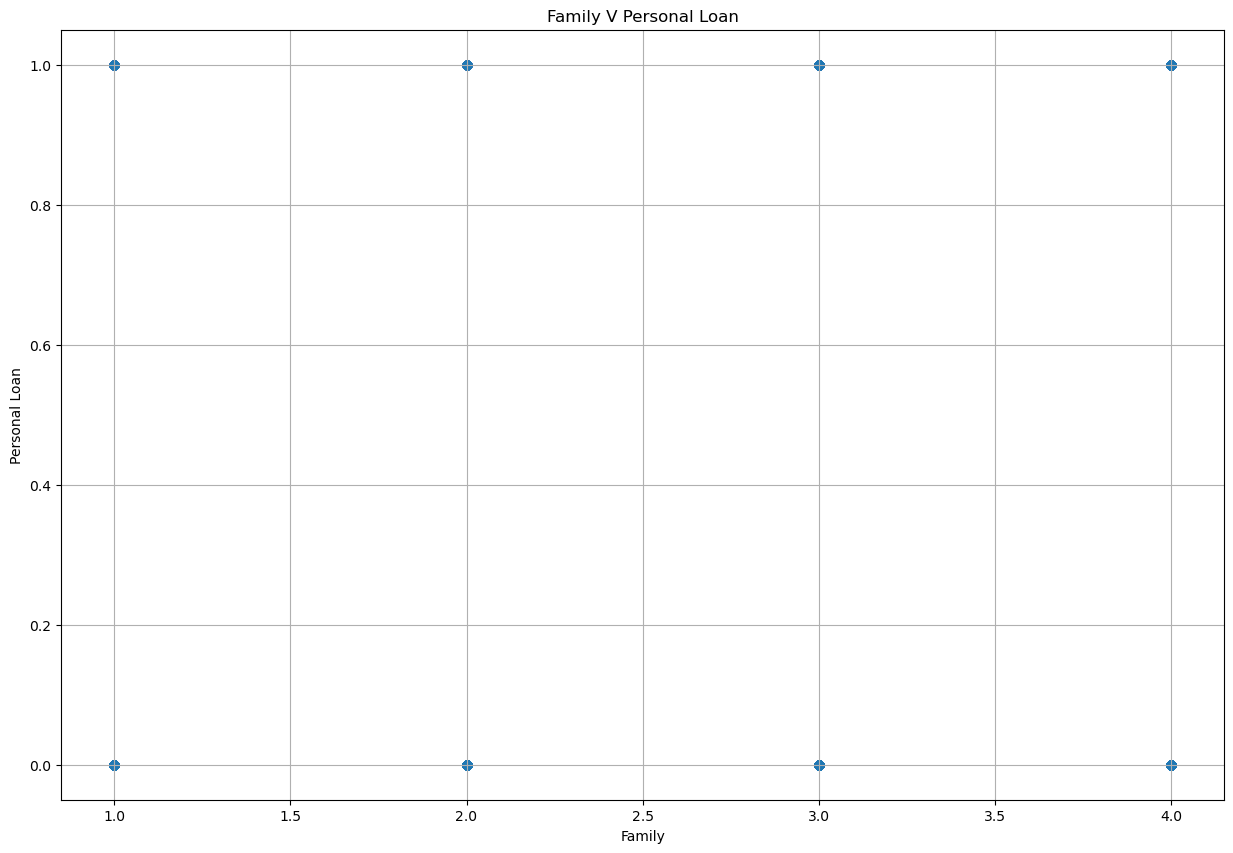

In [55]:
plt.figure(figsize=(15,10))
plt.scatter(df['Family'], df['Personal Loan'])
plt.xlabel("Family")
plt.ylabel("Personal Loan")
plt.title('Family V Personal Loan')
plt.grid()

plt.show()

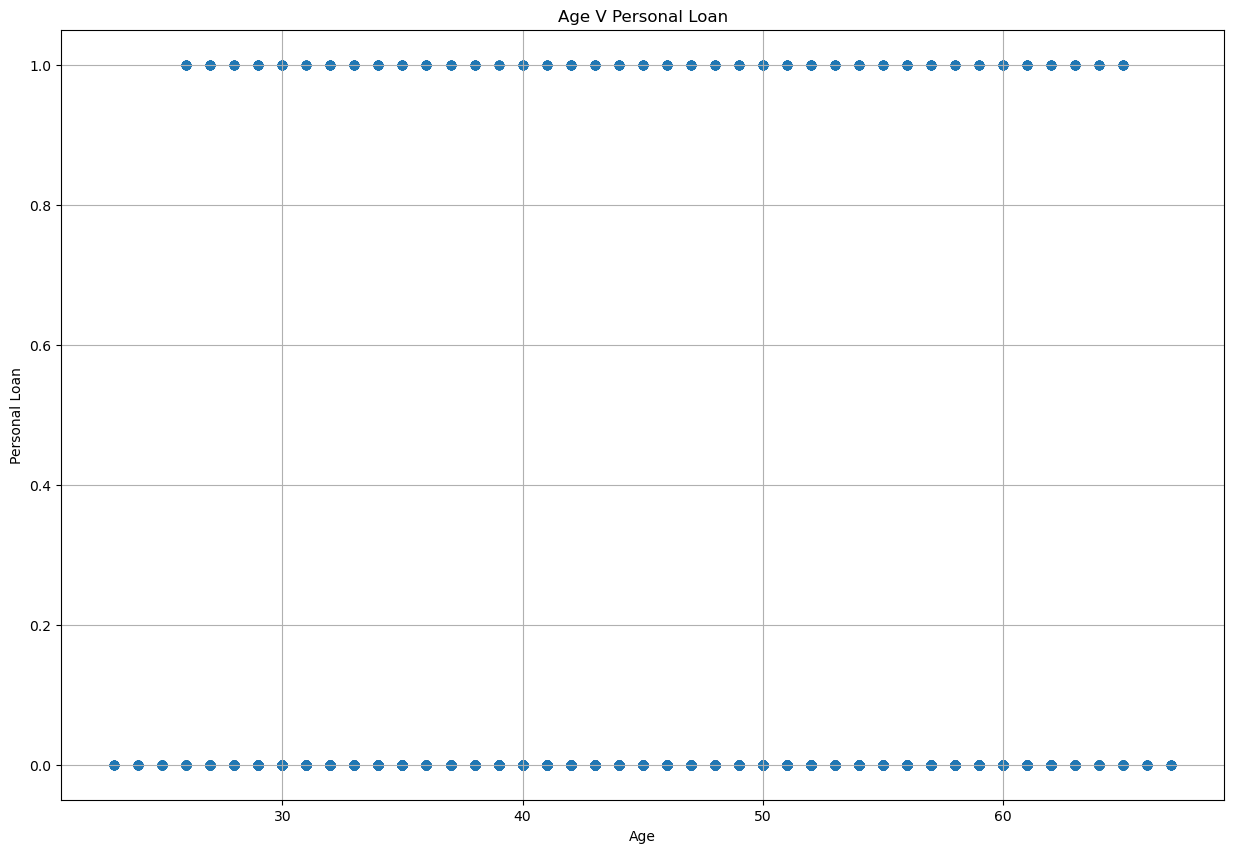

In [56]:
plt.figure(figsize=(15,10))
plt.scatter(df['Age'], df['Personal Loan'])
plt.xlabel("Age")
plt.ylabel("Personal Loan")
plt.title('Age V Personal Loan')
plt.grid()

plt.show()

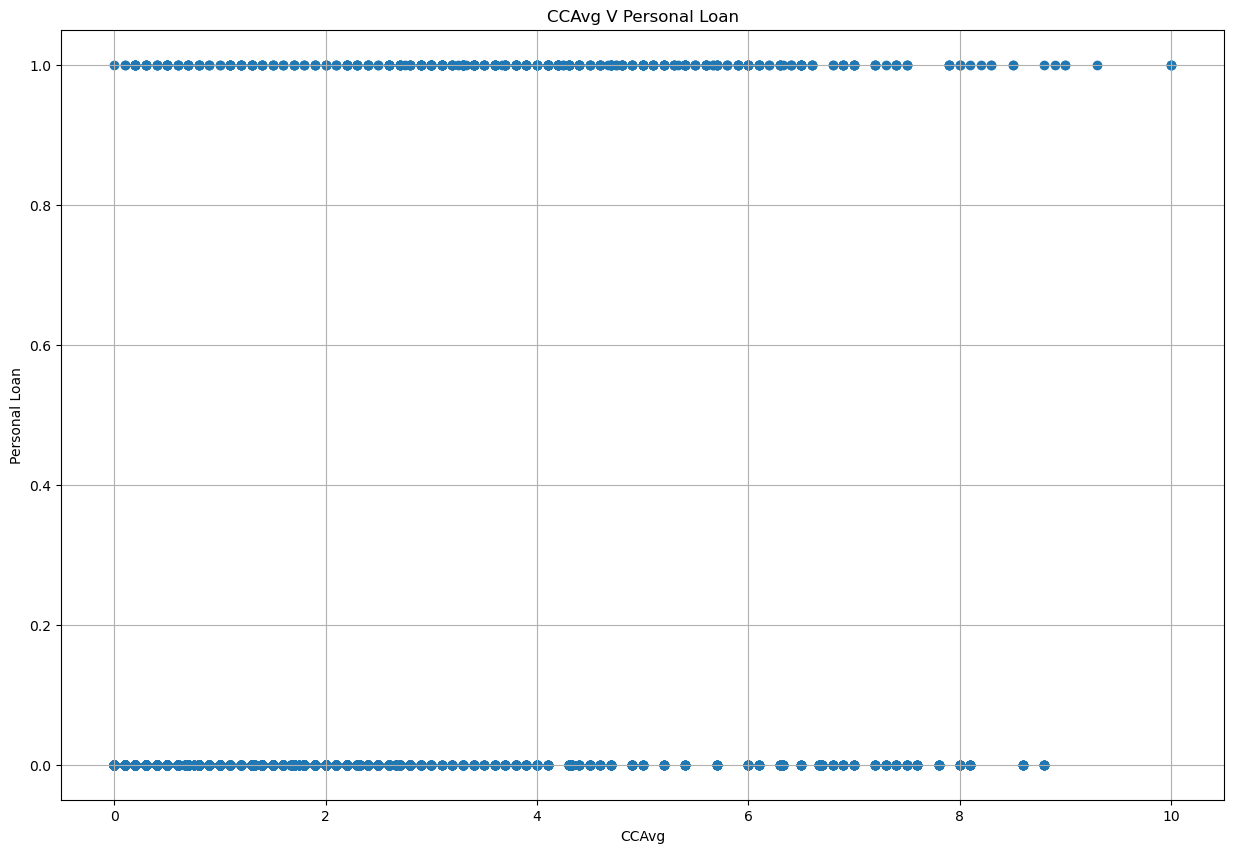

In [57]:
plt.figure(figsize=(15,10))
plt.scatter(df['CCAvg'], df['Personal Loan'])
plt.xlabel("CCAvg")
plt.ylabel("Personal Loan")
plt.title('CCAvg V Personal Loan')
plt.grid()
plt.show()

In [58]:
#ccavg ==10 maybe noise

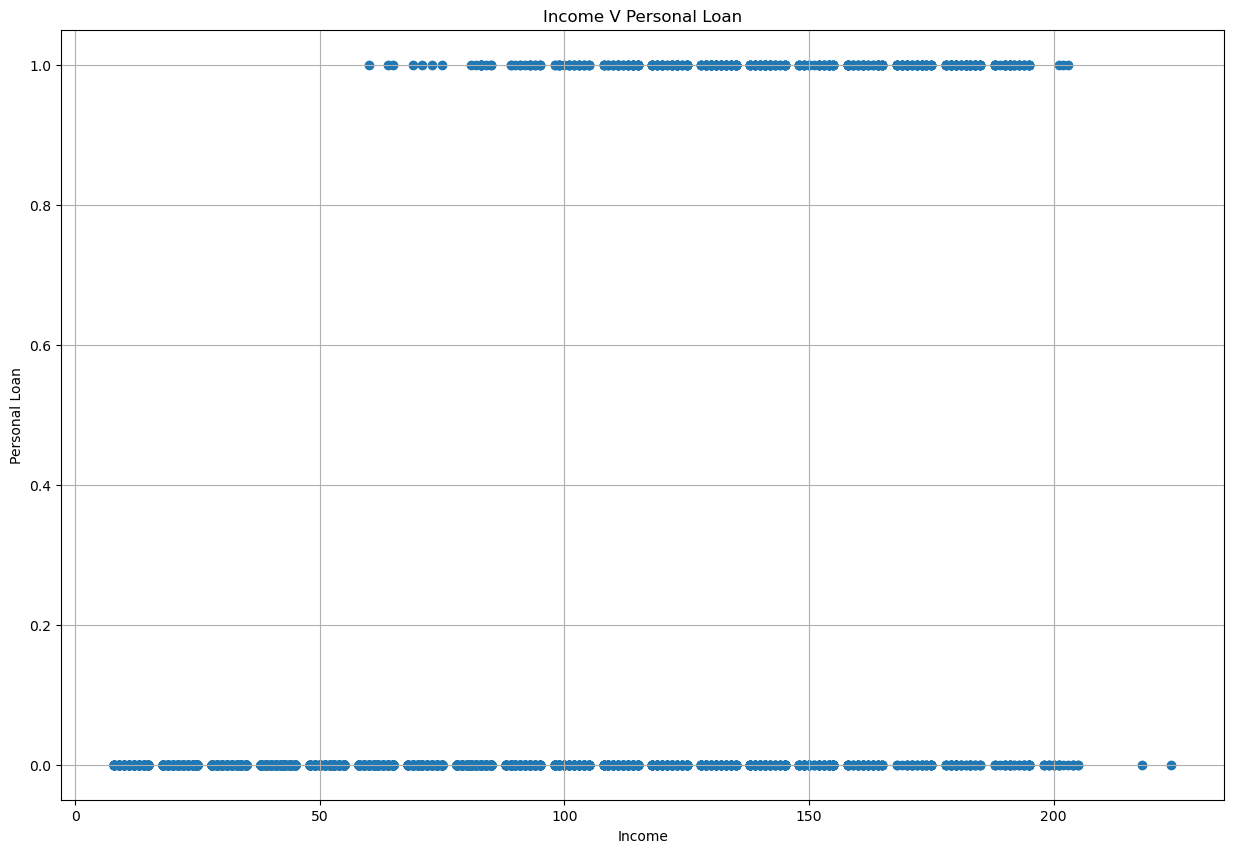

In [59]:
plt.figure(figsize=(15,10))
plt.scatter(df['Income'], df['Personal Loan'])
plt.xlabel("Income")
plt.ylabel("Personal Loan")
plt.title('Income V Personal Loan')
plt.grid()
plt.show()

In [60]:
# maybe Income > 210 are noises

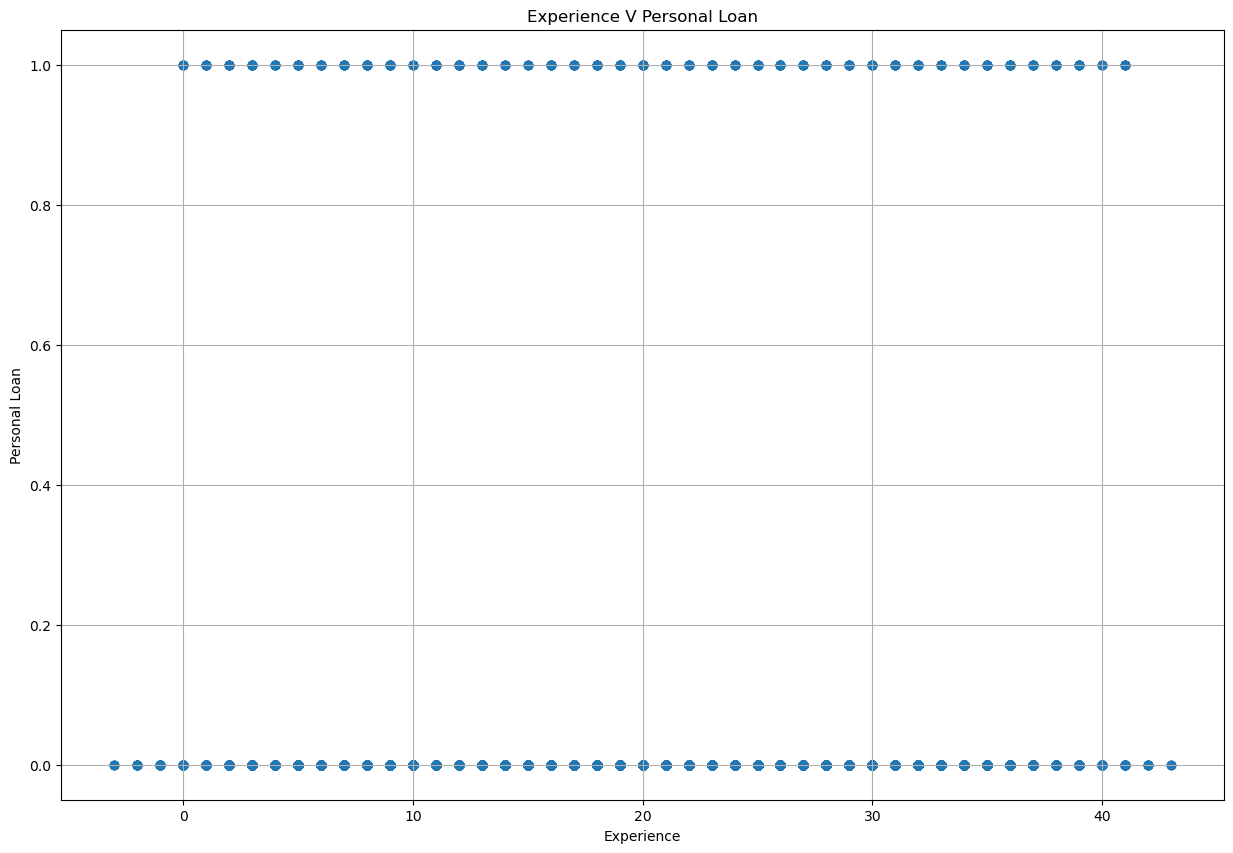

In [61]:
plt.figure(figsize=(15,10))
plt.scatter(df['Experience'], df['Personal Loan'])
plt.xlabel("Experience")
plt.ylabel("Personal Loan")
plt.title('Experience V Personal Loan')
plt.grid()
plt.savefig("C://machine learning/car data/Fuel_Type vs selling price")
plt.show()

In [62]:
df[df['Experience']<0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25.0,-1.0,113.0,94303.0,4.0,2.30,3.0,0.0,0.0,0.0,0.0,0.0,1.0
226,24.0,-1.0,39.0,94085.0,2.0,1.70,2.0,0.0,0.0,0.0,0.0,0.0,0.0
315,24.0,-2.0,51.0,90630.0,3.0,0.30,3.0,0.0,0.0,0.0,0.0,1.0,0.0
451,28.0,-2.0,48.0,94132.0,2.0,1.75,3.0,89.0,0.0,0.0,0.0,1.0,0.0
524,24.0,-1.0,75.0,93014.0,4.0,0.20,1.0,0.0,0.0,0.0,0.0,1.0,0.0
536,25.0,-1.0,43.0,92173.0,3.0,2.40,2.0,176.0,0.0,0.0,0.0,1.0,0.0
540,25.0,-1.0,109.0,94010.0,4.0,2.30,3.0,314.0,0.0,0.0,0.0,1.0,0.0
576,25.0,-1.0,48.0,92870.0,3.0,0.30,3.0,0.0,0.0,0.0,0.0,0.0,1.0
583,24.0,-1.0,38.0,95045.0,2.0,1.70,2.0,0.0,0.0,0.0,0.0,1.0,0.0
597,24.0,-2.0,125.0,92835.0,2.0,7.20,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [63]:
# at least years of proffesional experience is 0 but we have some under 0 experince. they are noise because they are not true
# and their age are under 30
# indeed, these numbers are positive not negative

In [64]:
df[df["Experience"]<0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25.0,-1.0,113.0,94303.0,4.0,2.30,3.0,0.0,0.0,0.0,0.0,0.0,1.0
226,24.0,-1.0,39.0,94085.0,2.0,1.70,2.0,0.0,0.0,0.0,0.0,0.0,0.0
315,24.0,-2.0,51.0,90630.0,3.0,0.30,3.0,0.0,0.0,0.0,0.0,1.0,0.0
451,28.0,-2.0,48.0,94132.0,2.0,1.75,3.0,89.0,0.0,0.0,0.0,1.0,0.0
524,24.0,-1.0,75.0,93014.0,4.0,0.20,1.0,0.0,0.0,0.0,0.0,1.0,0.0
536,25.0,-1.0,43.0,92173.0,3.0,2.40,2.0,176.0,0.0,0.0,0.0,1.0,0.0
540,25.0,-1.0,109.0,94010.0,4.0,2.30,3.0,314.0,0.0,0.0,0.0,1.0,0.0
576,25.0,-1.0,48.0,92870.0,3.0,0.30,3.0,0.0,0.0,0.0,0.0,0.0,1.0
583,24.0,-1.0,38.0,95045.0,2.0,1.70,2.0,0.0,0.0,0.0,0.0,1.0,0.0
597,24.0,-2.0,125.0,92835.0,2.0,7.20,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [65]:
#df2=df.copy()
#df2["Experience"] = abs(df2["Experience"]
#df2['Experience'][1]

In [66]:
df["Experience"] = abs(df['Experience'])
df["Experience"][89]

1.0

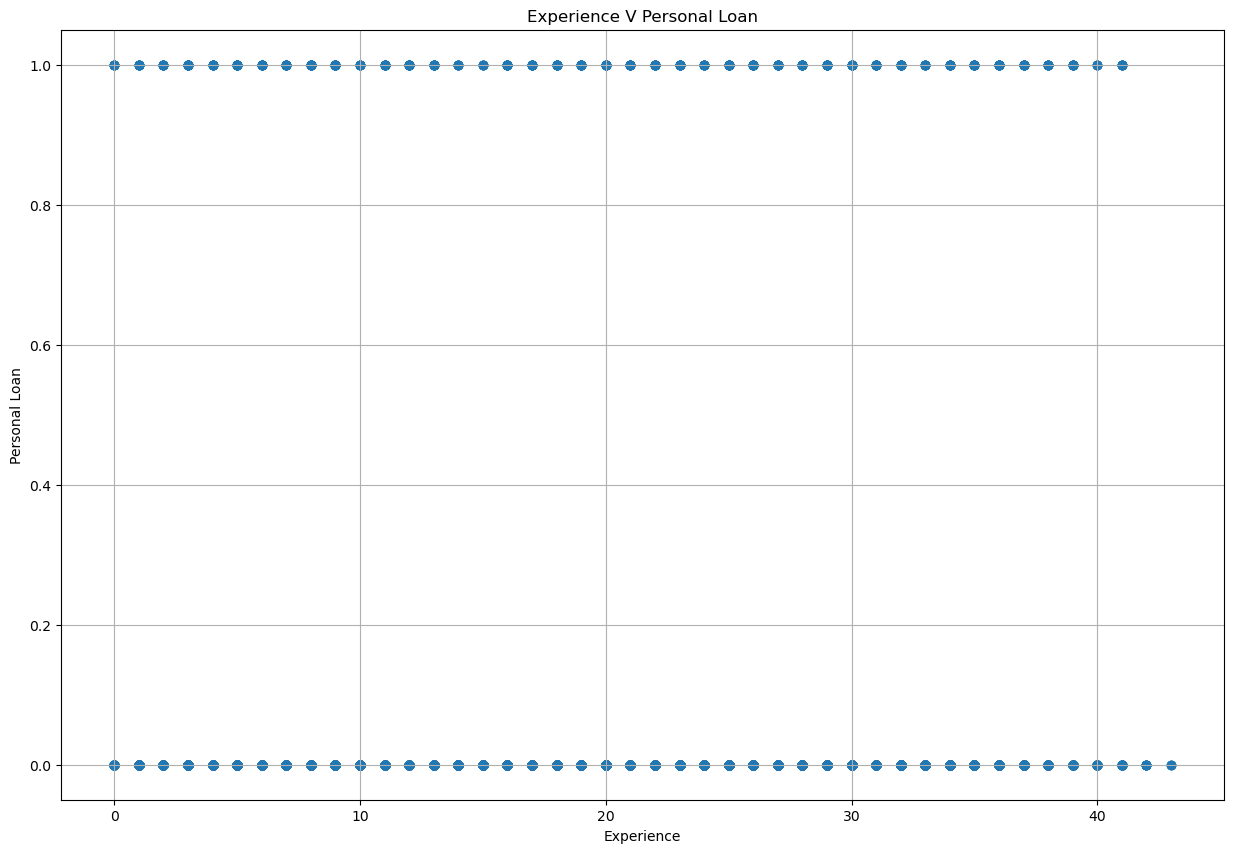

In [67]:
plt.figure(figsize=(15,10))
plt.scatter(df['Experience'], df['Personal Loan'])
plt.xlabel("Experience")
plt.ylabel("Personal Loan")
plt.title('Experience V Personal Loan')
plt.grid()
plt.savefig("C://machine learning/car data/Fuel_Type vs selling price")
plt.show()

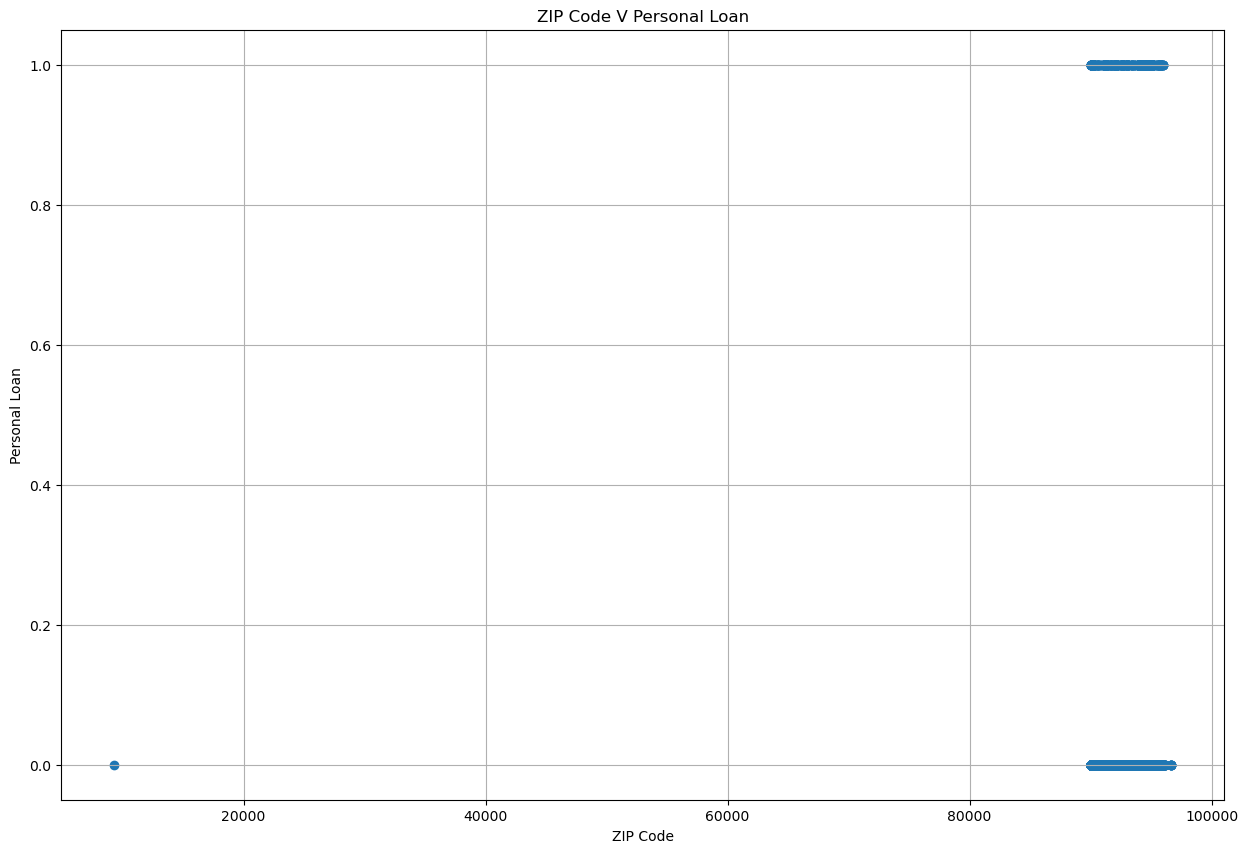

In [68]:
plt.figure(figsize=(15,10))
plt.scatter(df['ZIP Code'], df['Personal Loan'])
plt.xlabel("ZIP Code")
plt.ylabel("Personal Loan")
plt.title('ZIP Code V Personal Loan')
plt.grid()
plt.savefig("C://machine learning/car data/Fuel_Type vs selling price")
plt.show()

In [69]:
df[df['ZIP Code']<89000]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51.0,25.0,21.0,9307.0,4.0,0.6,3.0,0.0,0.0,0.0,0.0,1.0,1.0


In [70]:
# ZIP Code index 384 is noise because I think its a wrong record and they wanted to record it betwenn 90 k and 100k

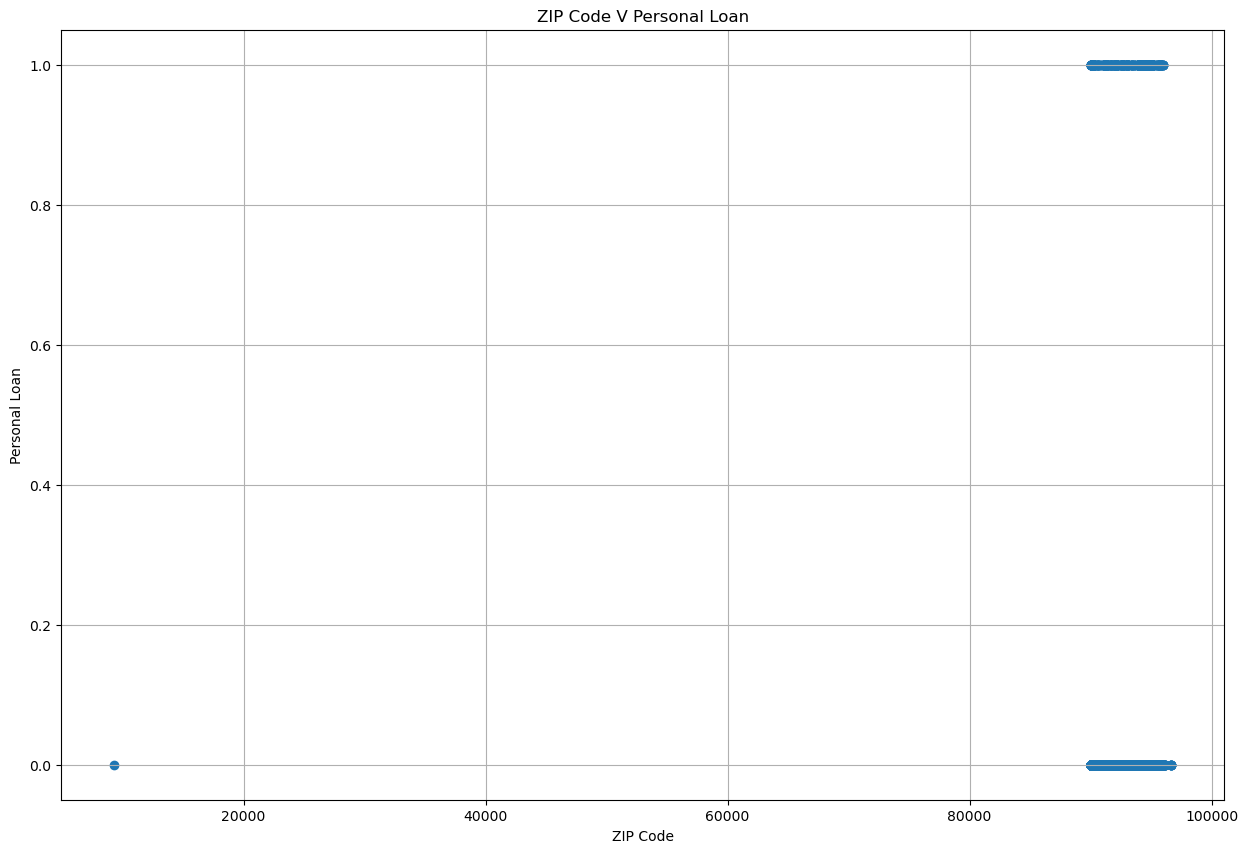

In [71]:
plt.figure(figsize=(15,10))
plt.scatter(df['ZIP Code'], df['Personal Loan'])
plt.xlabel("ZIP Code")
plt.ylabel("Personal Loan")
plt.title('ZIP Code V Personal Loan')
plt.grid()
plt.show()

In [72]:
# maybe ZIP Code > 96200 is noise

In [73]:
df[df['ZIP Code']==92037]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
107,42.0,18.0,43.0,92037.0,1.0,0.70,1.0,136.0,0.0,0.0,0.0,0.0,0.0
555,34.0,8.0,35.0,92037.0,4.0,0.80,1.0,137.0,0.0,0.0,1.0,1.0,1.0
591,30.0,5.0,51.0,92037.0,1.0,1.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0
636,40.0,16.0,120.0,92037.0,2.0,6.10,1.0,196.0,0.0,0.0,0.0,1.0,0.0
725,39.0,15.0,119.0,92037.0,2.0,6.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
727,62.0,37.0,18.0,92037.0,3.0,1.30,2.0,0.0,0.0,0.0,0.0,1.0,0.0
865,60.0,34.0,22.0,92037.0,3.0,0.30,3.0,139.0,0.0,0.0,0.0,1.0,1.0
948,30.0,4.0,81.0,92037.0,1.0,2.90,3.0,259.0,0.0,0.0,0.0,1.0,1.0
964,27.0,1.0,78.0,92037.0,4.0,2.30,3.0,157.0,0.0,1.0,0.0,1.0,0.0
996,33.0,6.0,49.0,92037.0,2.0,1.67,2.0,214.0,0.0,0.0,0.0,0.0,0.0


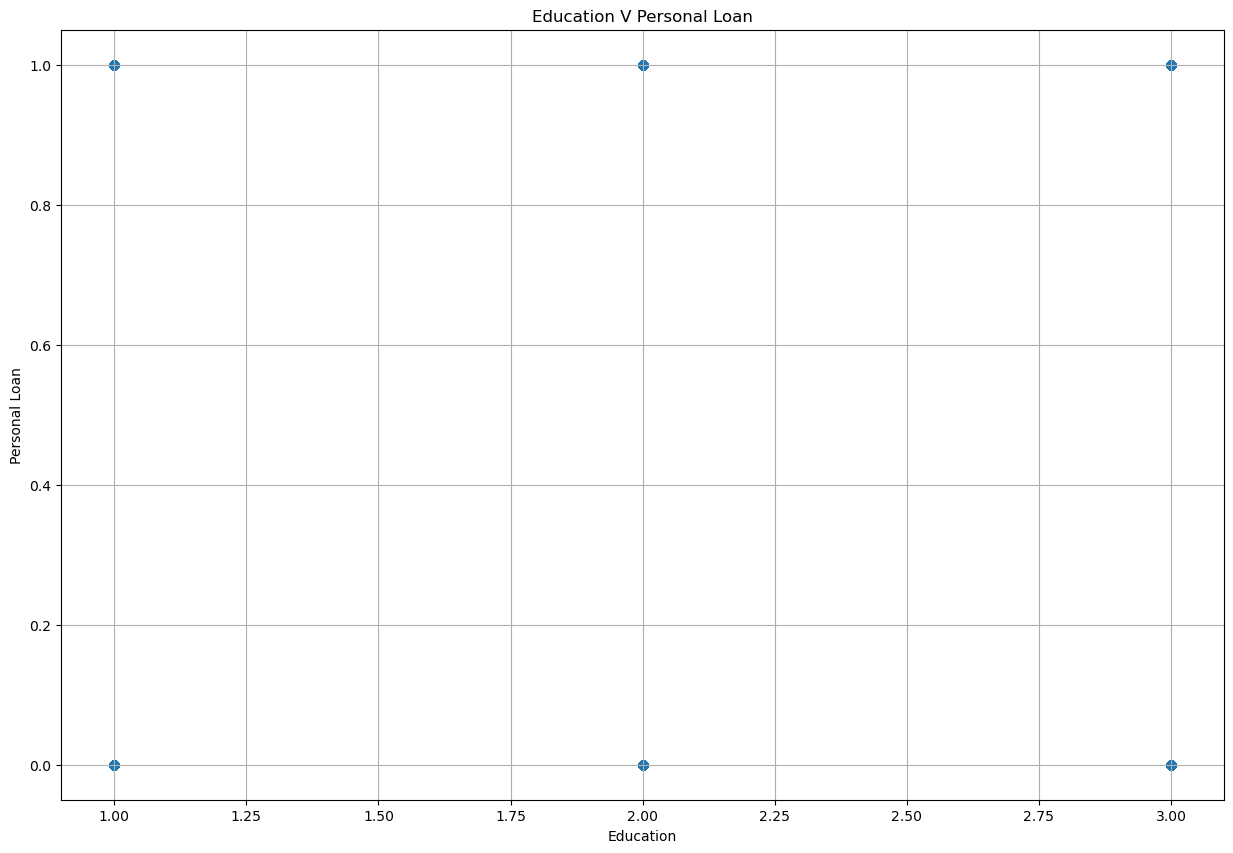

In [74]:
plt.figure(figsize=(15,10))
plt.scatter(df['Education'], df['Personal Loan'])
plt.xlabel("Education")
plt.ylabel("Personal Loan")
plt.title('Education V Personal Loan')
plt.grid()
plt.show()

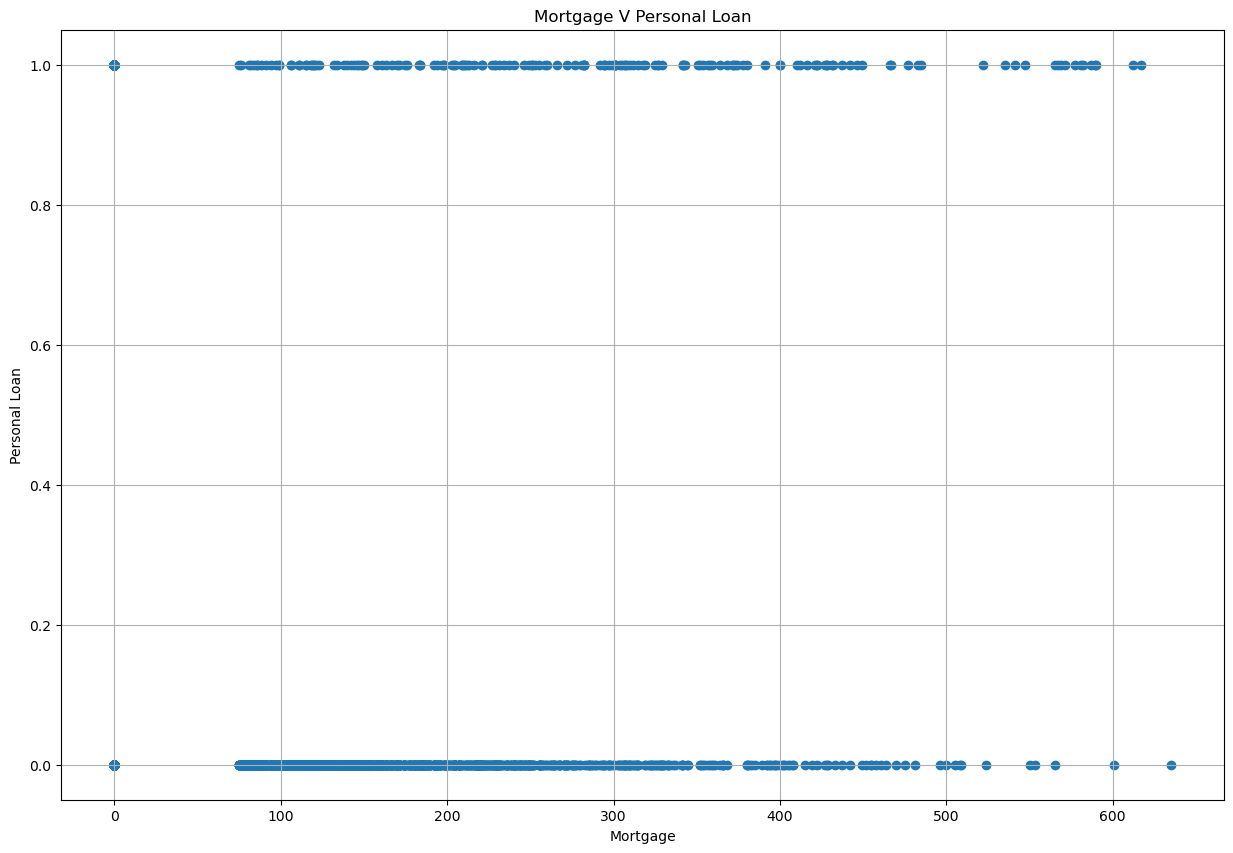

In [75]:
plt.figure(figsize=(15,10))
plt.scatter(df['Mortgage'], df['Personal Loan'])
plt.xlabel("Mortgage")
plt.ylabel("Personal Loan")
plt.title('Mortgage V Personal Loan')
plt.grid()
plt.show()

In [76]:
# mortgage > 610

<AxesSubplot:xlabel='Mortgage', ylabel='count'>

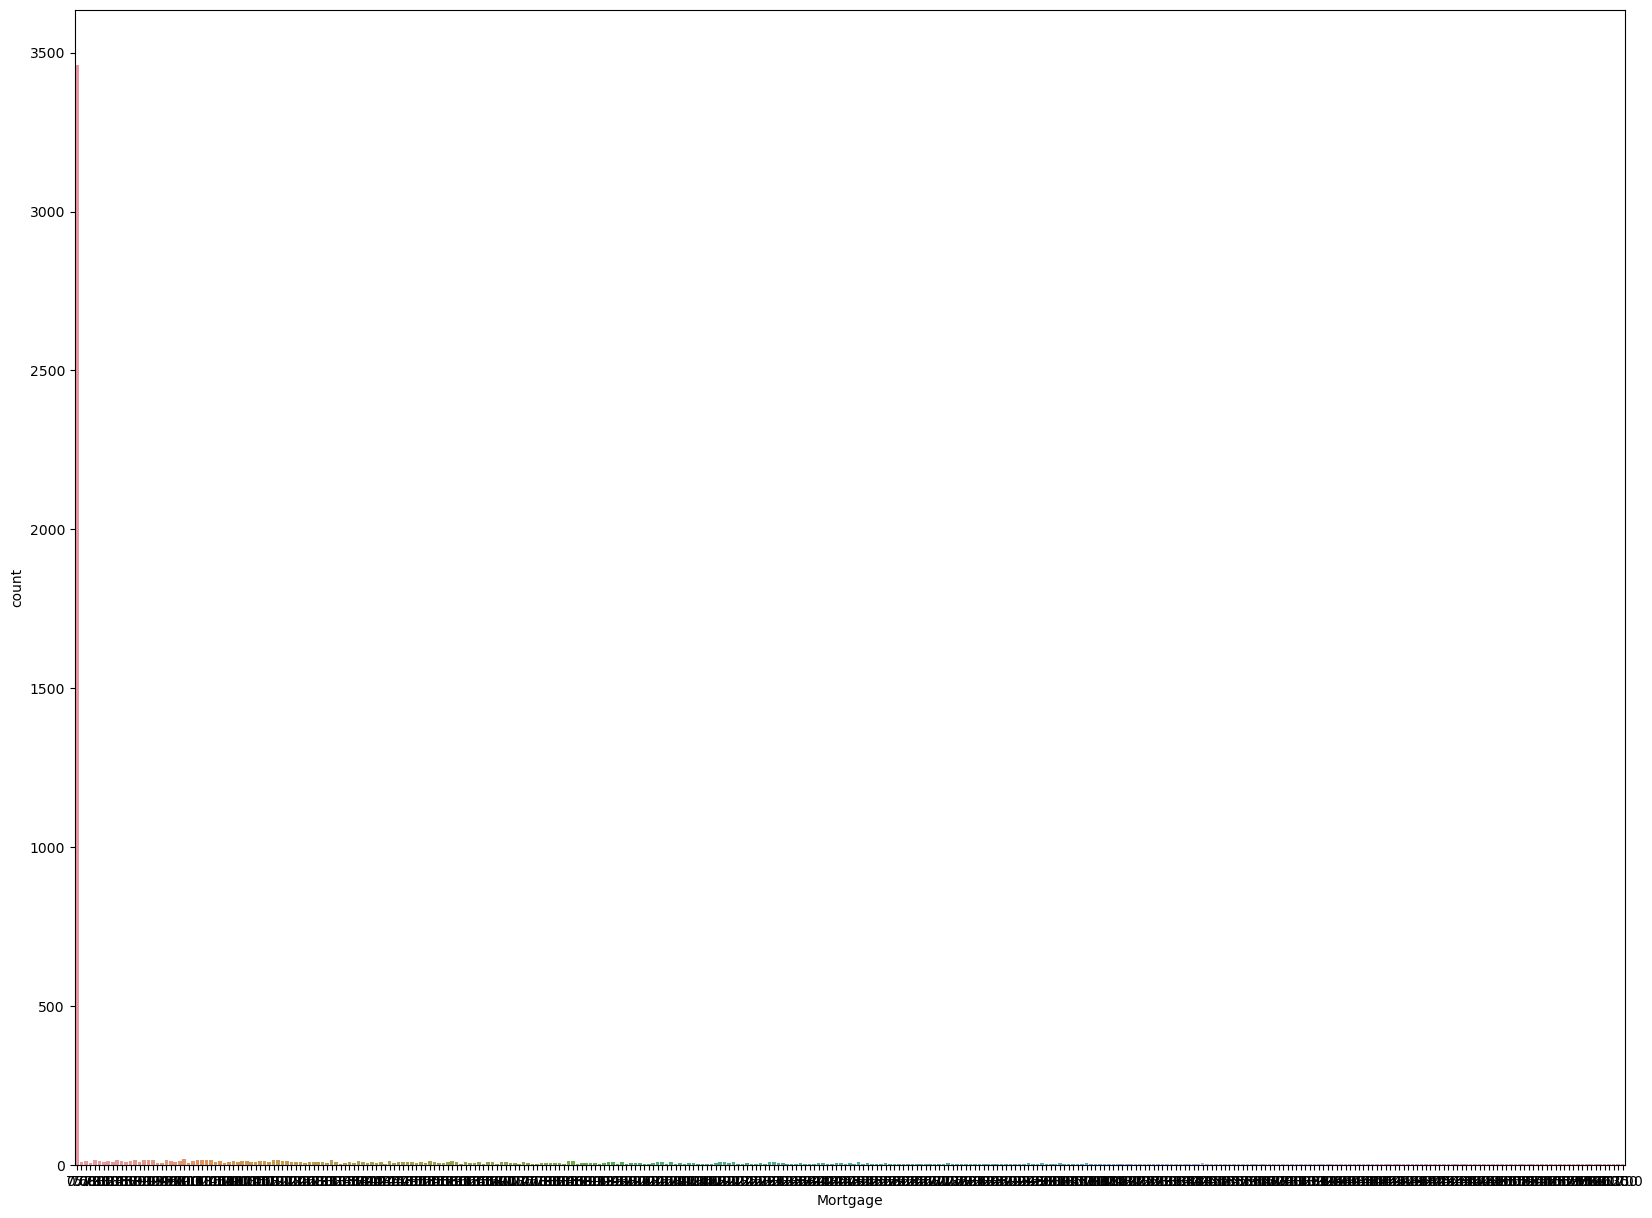

In [77]:
#df[df['Mortgage']==0]
plt.figure(figsize=(20,15))
sns.countplot(x=df['Mortgage'])

In [78]:
df.drop(384,inplace=True)

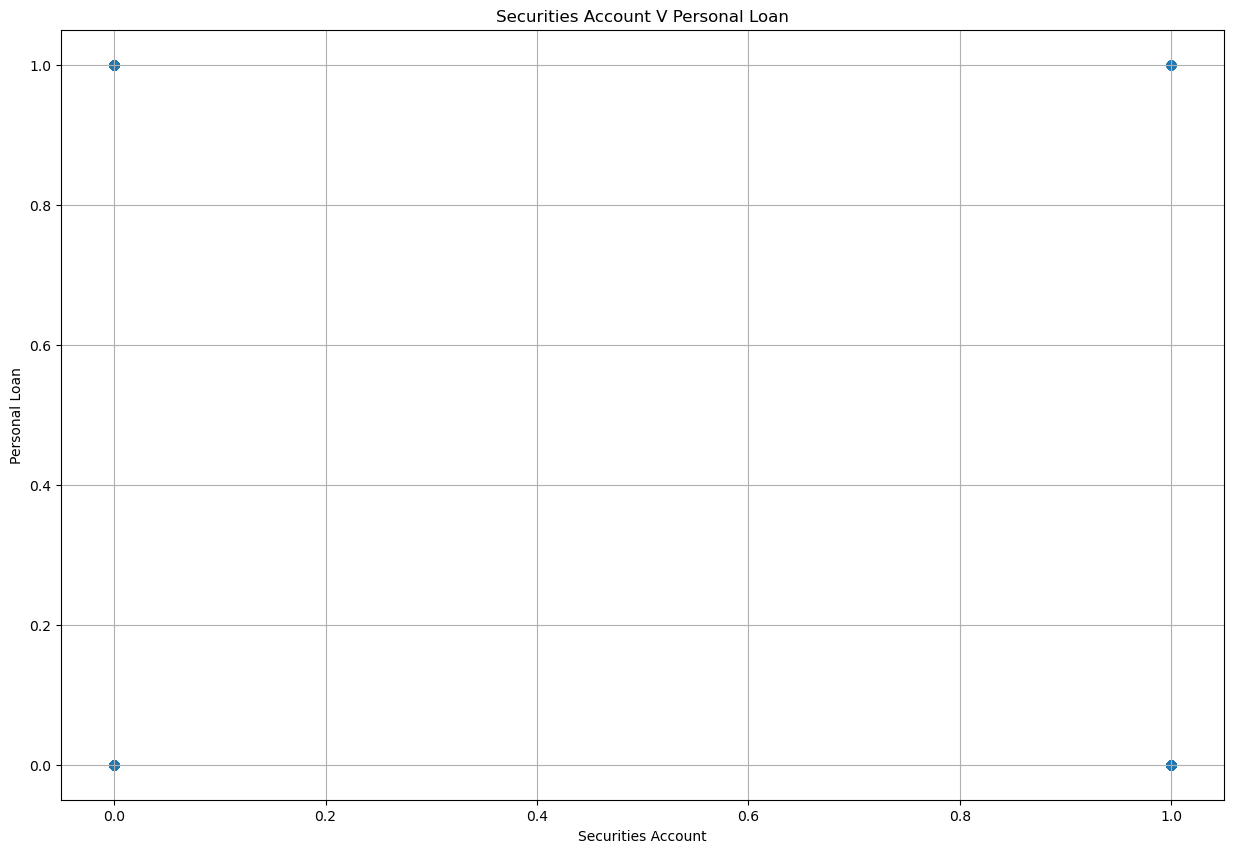

In [79]:
plt.figure(figsize=(15,10))
plt.scatter(df['Securities Account'], df['Personal Loan'])
plt.xlabel("Securities Account")
plt.ylabel("Personal Loan")
plt.title('Securities Account V Personal Loan')
plt.grid()
plt.show()

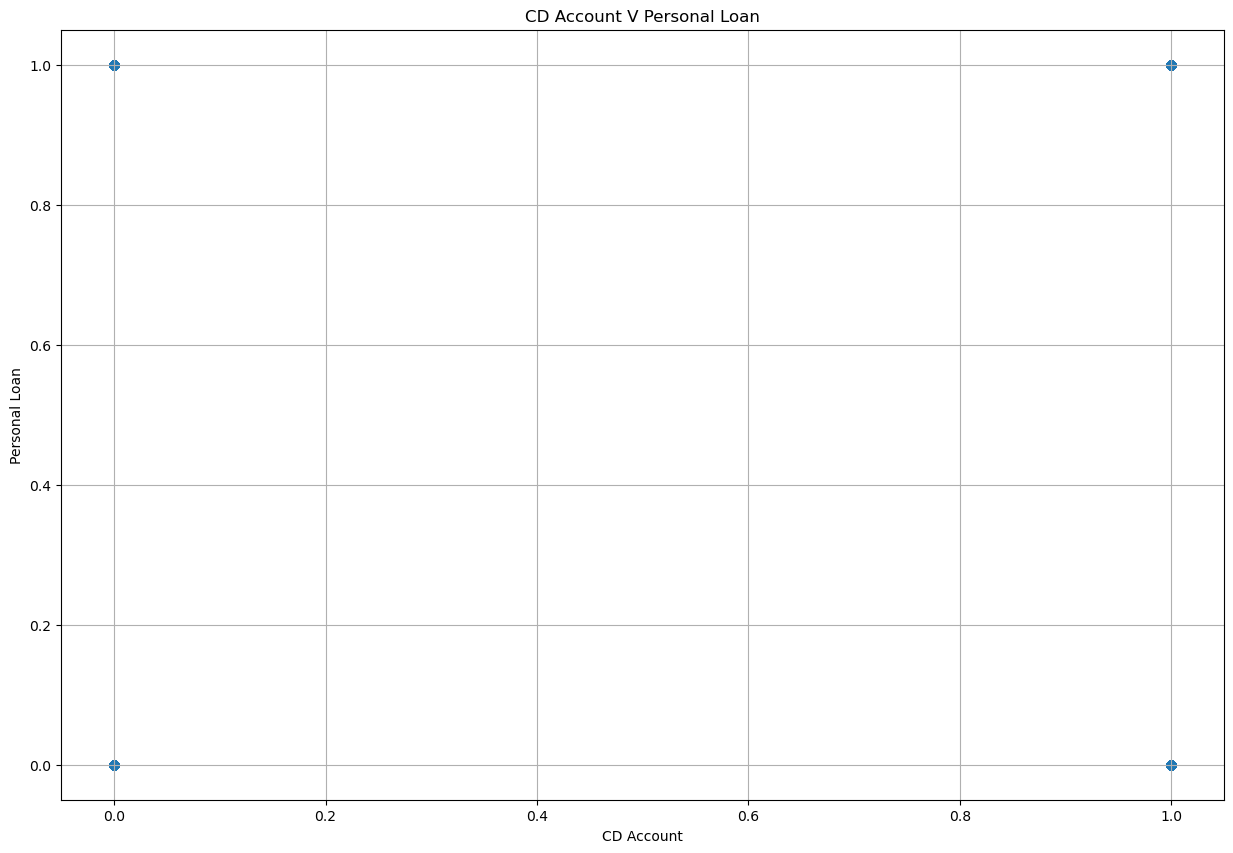

In [80]:
plt.figure(figsize=(15,10))
plt.scatter(df['CD Account'], df['Personal Loan'])
plt.xlabel("CD Account")
plt.ylabel("Personal Loan")
plt.title('CD Account V Personal Loan')
plt.grid()
plt.show()

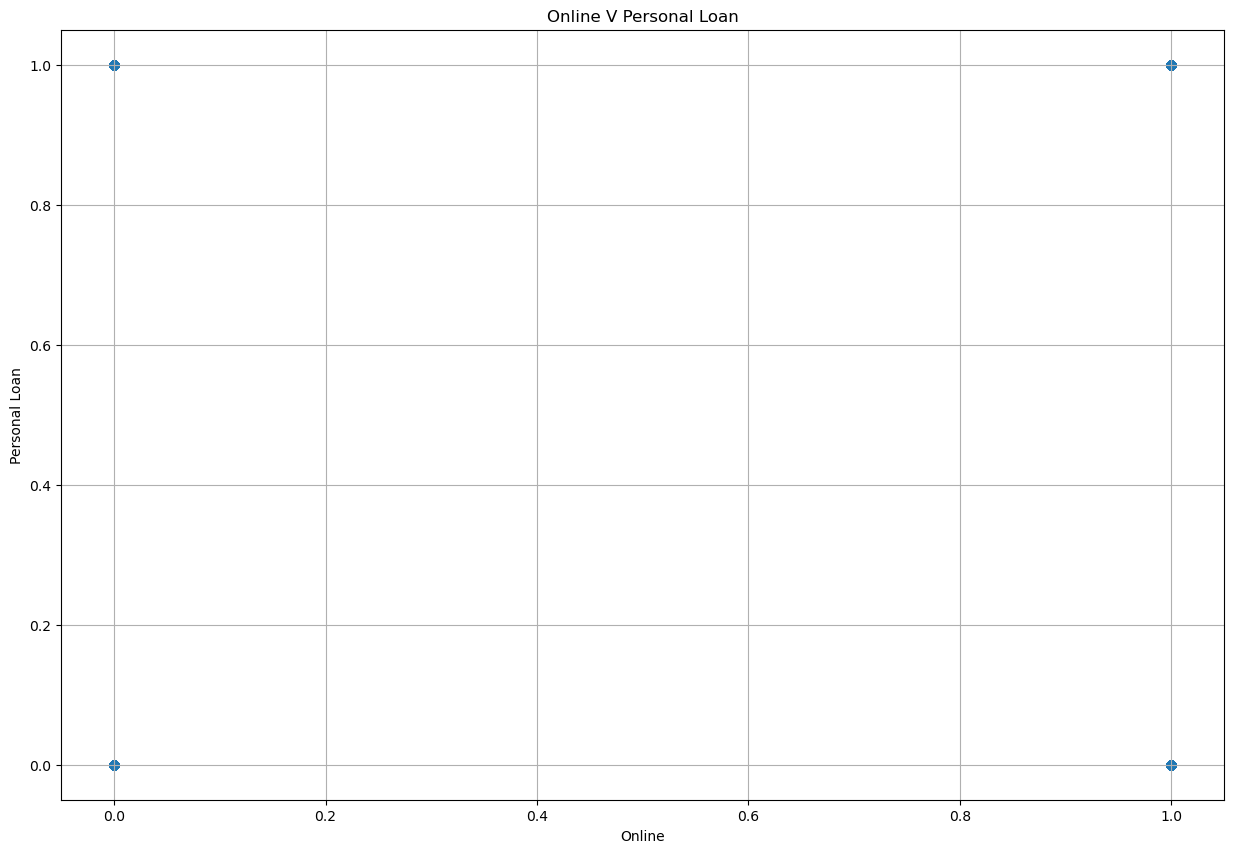

In [81]:
plt.figure(figsize=(15,10))
plt.scatter(df['Online'], df['Personal Loan'])
plt.xlabel("Online")
plt.ylabel("Personal Loan")
plt.title('Online V Personal Loan')
plt.grid()
plt.show()

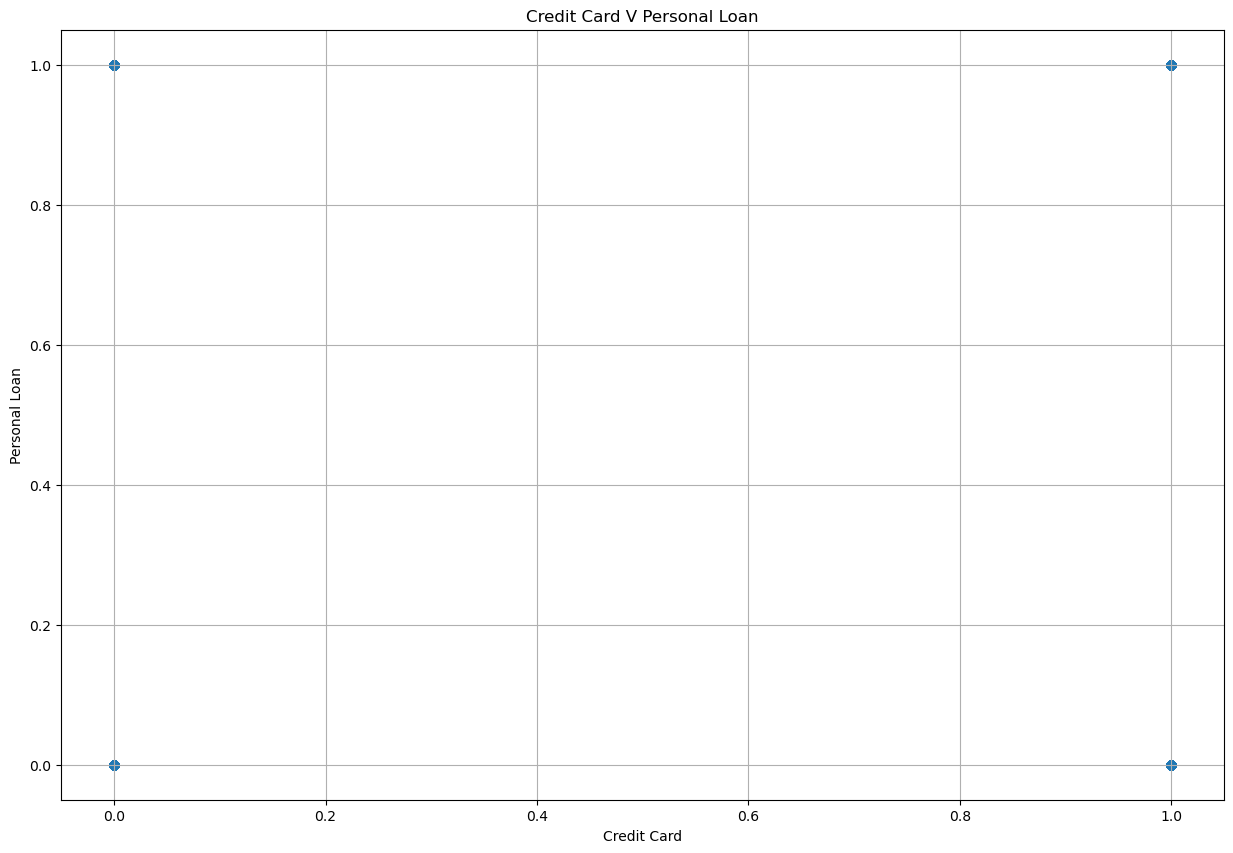

In [82]:
plt.figure(figsize=(15,10))
plt.scatter(df['CreditCard'], df['Personal Loan'])
plt.xlabel("Credit Card")
plt.ylabel("Personal Loan")
plt.title('Credit Card V Personal Loan')
plt.grid()
plt.show()

In [83]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055164,-0.030526,-0.046566,-0.051941,0.041211,-0.012484,-0.007694,-0.000403,0.008068,0.013622,0.007530
Experience,0.993991,1.000000,-0.046785,-0.030833,-0.051981,-0.049676,0.013808,-0.011050,-0.008276,-0.000960,0.009757,0.013982,0.008721
Income,-0.055164,-0.046785,1.000000,-0.030725,-0.157232,0.645931,-0.187277,0.206712,0.502459,-0.002695,0.169703,0.014397,-0.002030
ZIP Code,-0.030526,-0.030833,-0.030725,1.000000,0.027532,-0.012197,-0.008254,0.003608,-0.002977,0.002418,0.021669,0.028328,0.024055
Family,-0.046566,-0.051981,-0.157232,0.027532,1.000000,-0.109088,0.064581,-0.020294,0.061471,0.020094,0.014184,0.010127,0.011160
CCAvg,-0.051941,-0.049676,0.645931,-0.012197,-0.109088,1.000000,-0.135952,0.109829,0.366864,0.015035,0.136504,-0.003486,-0.006454
Education,0.041211,0.013808,-0.187277,-0.008254,0.064581,-0.135952,1.000000,-0.033186,0.136834,-0.010723,0.014004,-0.015227,-0.011432
Mortgage,-0.012484,-0.011050,0.206712,0.003608,-0.020294,0.109829,-0.033186,1.000000,0.142065,-0.005449,0.089286,-0.005904,-0.007061
Personal Loan,-0.007694,-0.008276,0.502459,-0.002977,0.061471,0.366864,0.136834,0.142065,1.000000,0.021932,0.316344,0.006332,0.002903
Securities Account,-0.000403,-0.000960,-0.002695,0.002418,0.020094,0.015035,-0.010723,-0.005449,0.021932,1.000000,0.317023,0.012685,-0.014926


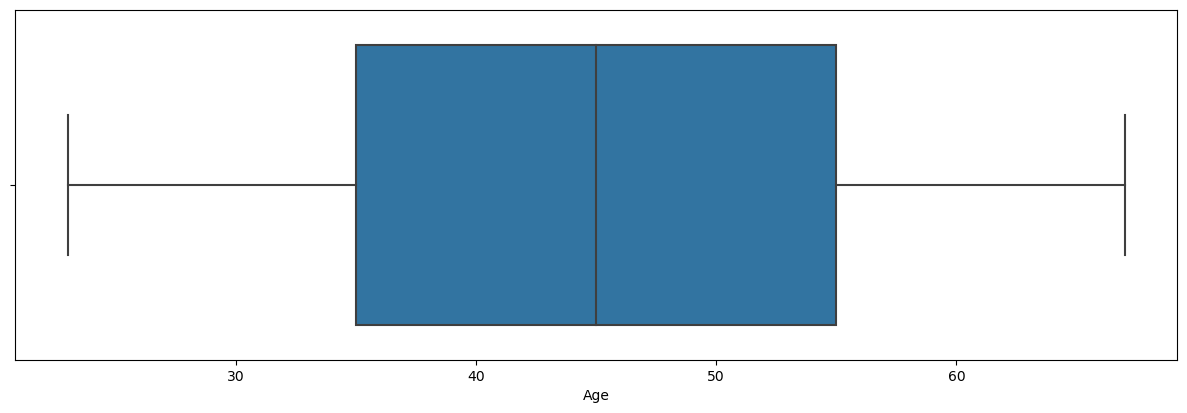

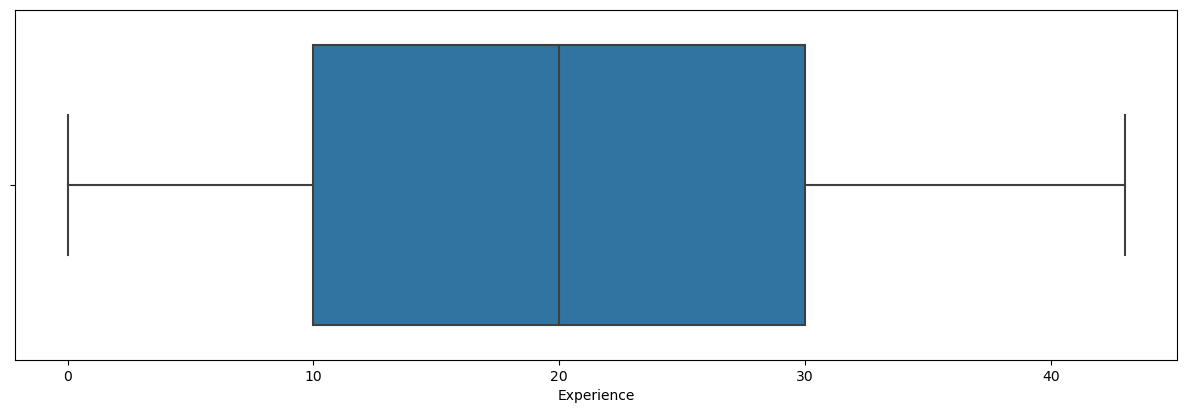

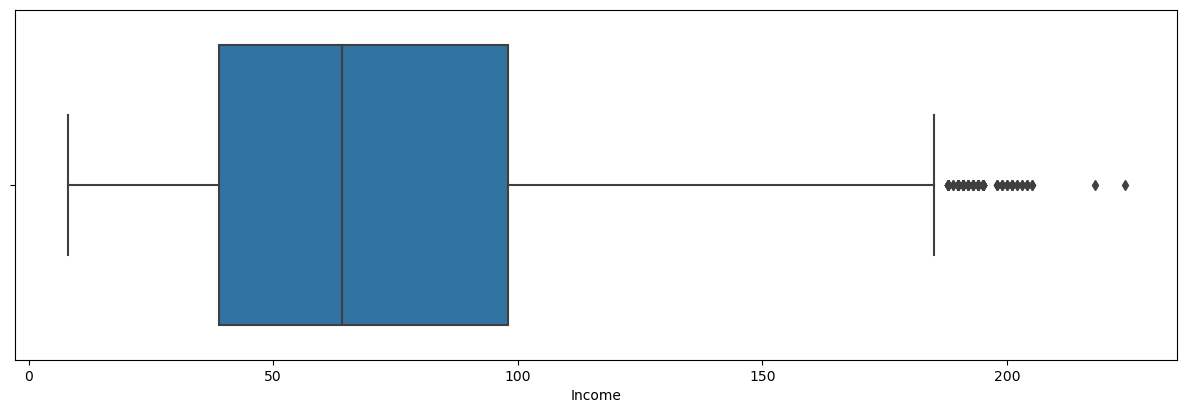

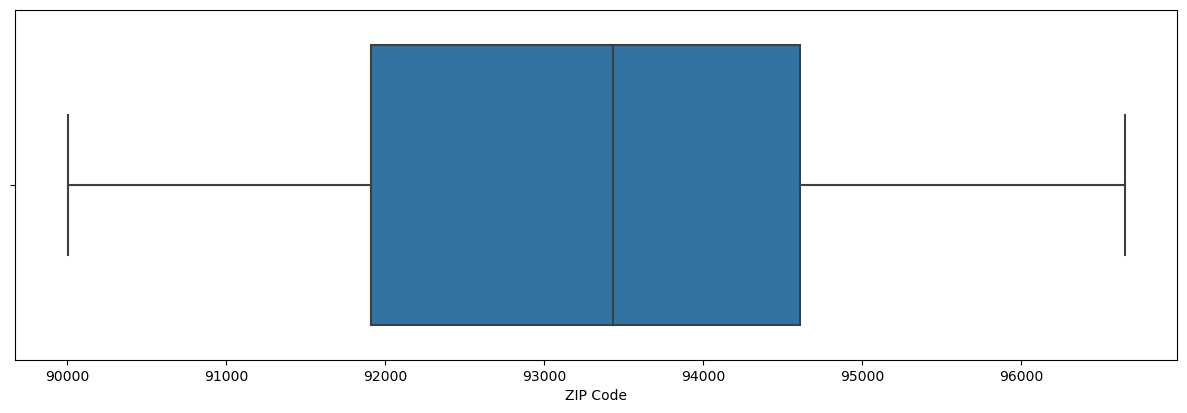

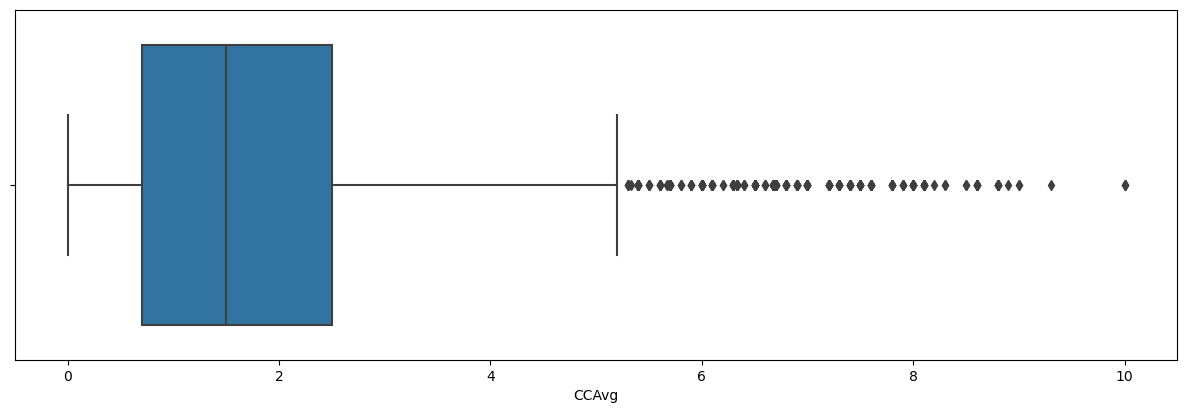

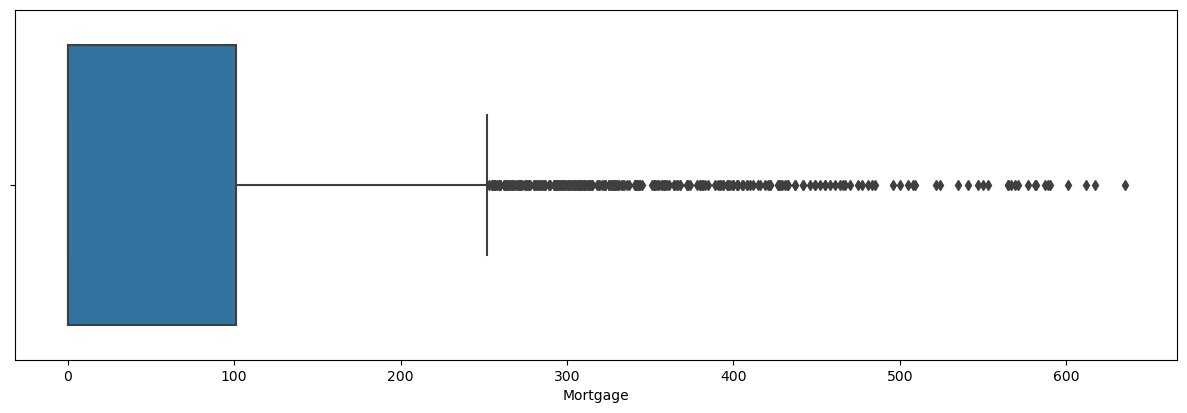

In [84]:
continious = ["Age","Experience","Income","ZIP Code","CCAvg","Mortgage"]


for i in continious:
    plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    sns.boxplot(x=df[i])
    plt.show()
    


<AxesSubplot:xlabel='Mortgage', ylabel='count'>

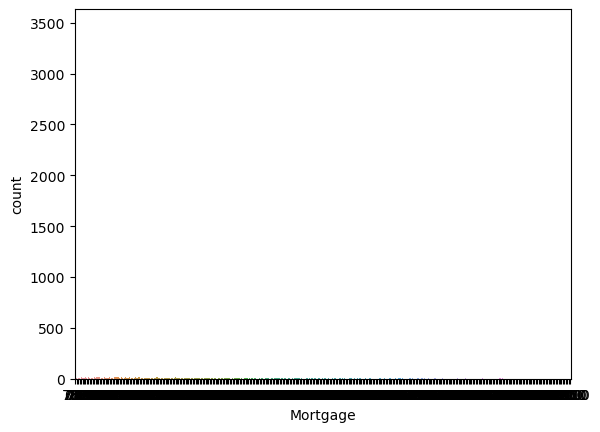

In [85]:
 sns.countplot(x=df['Mortgage'])

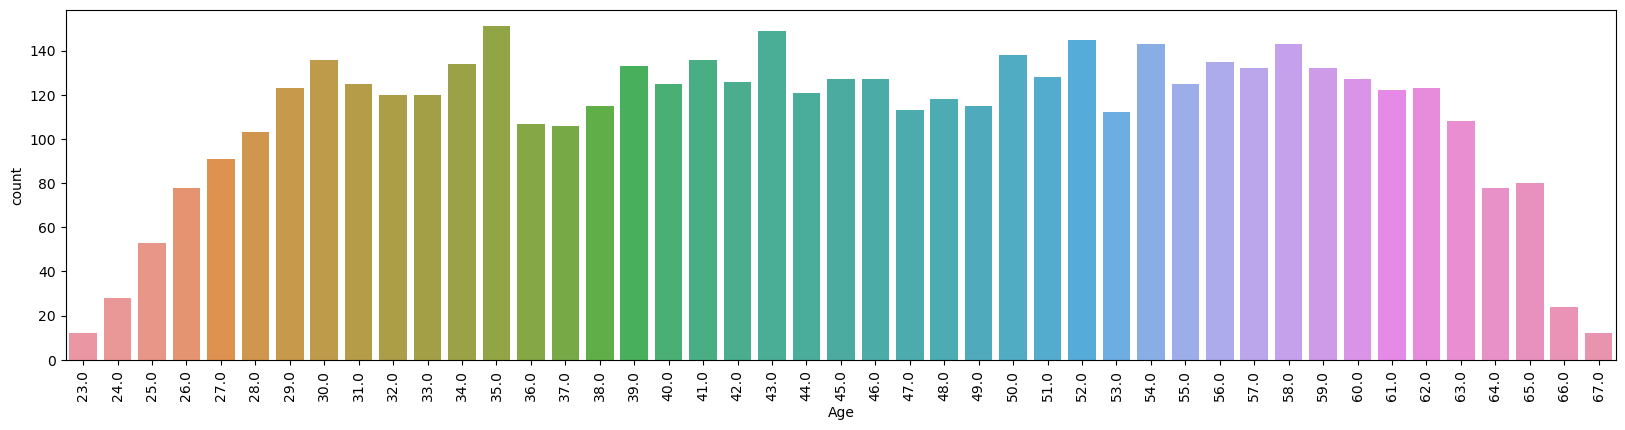

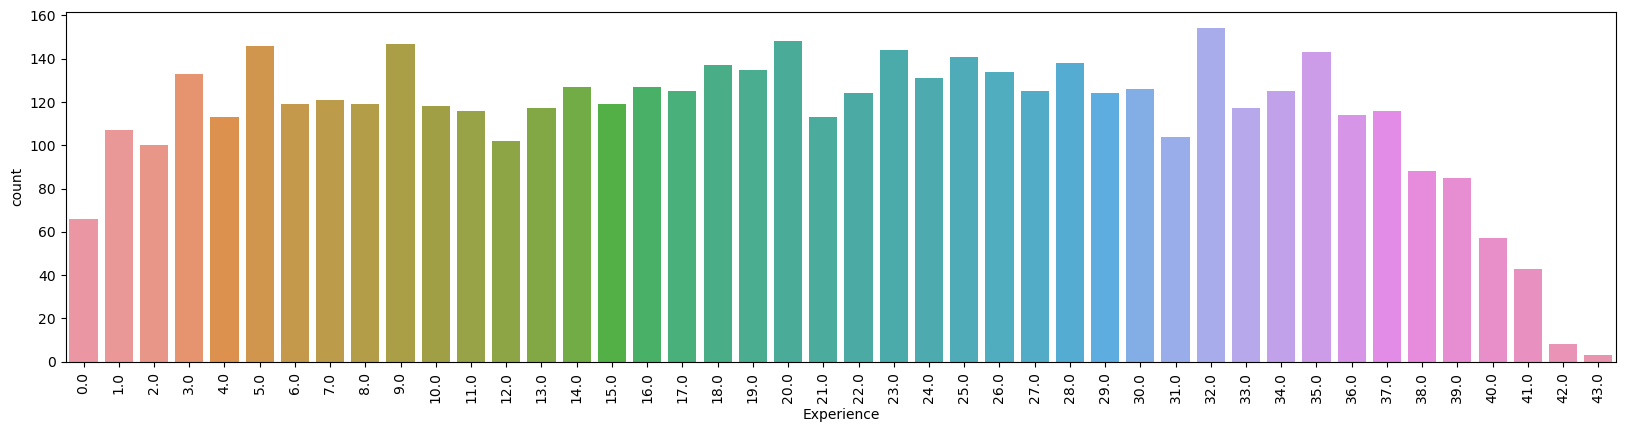

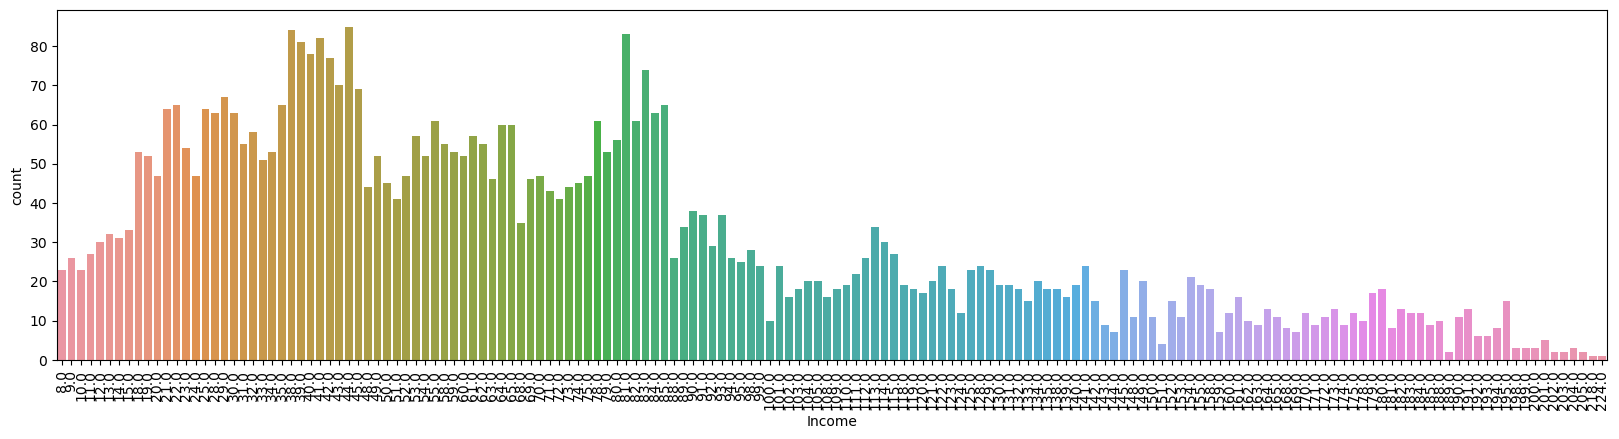

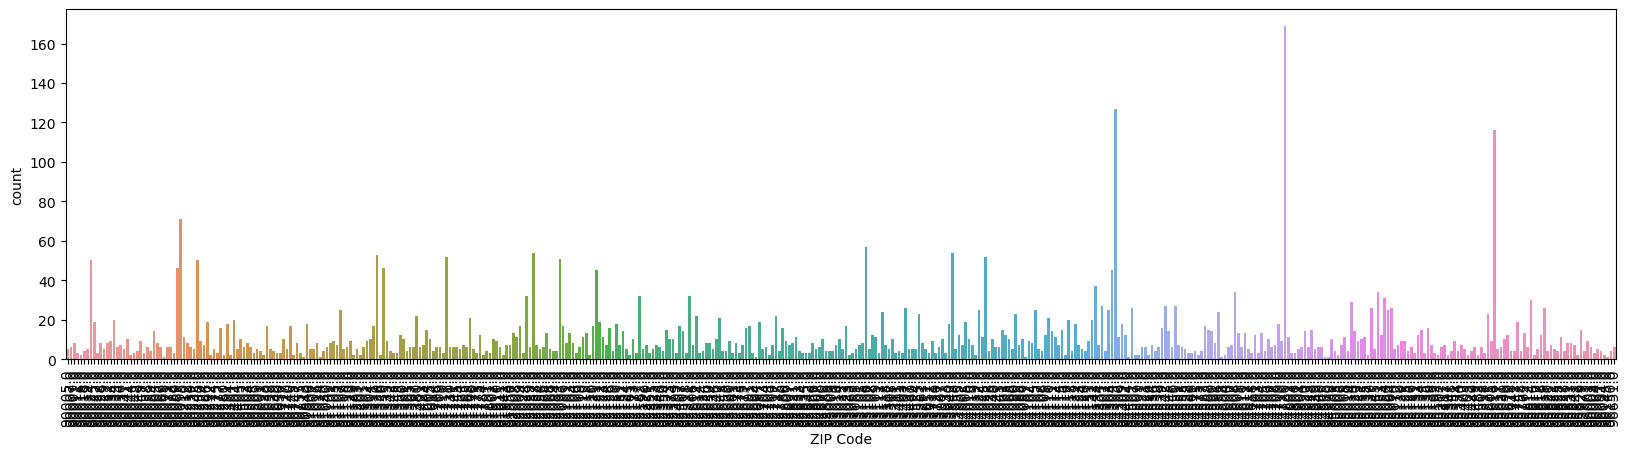

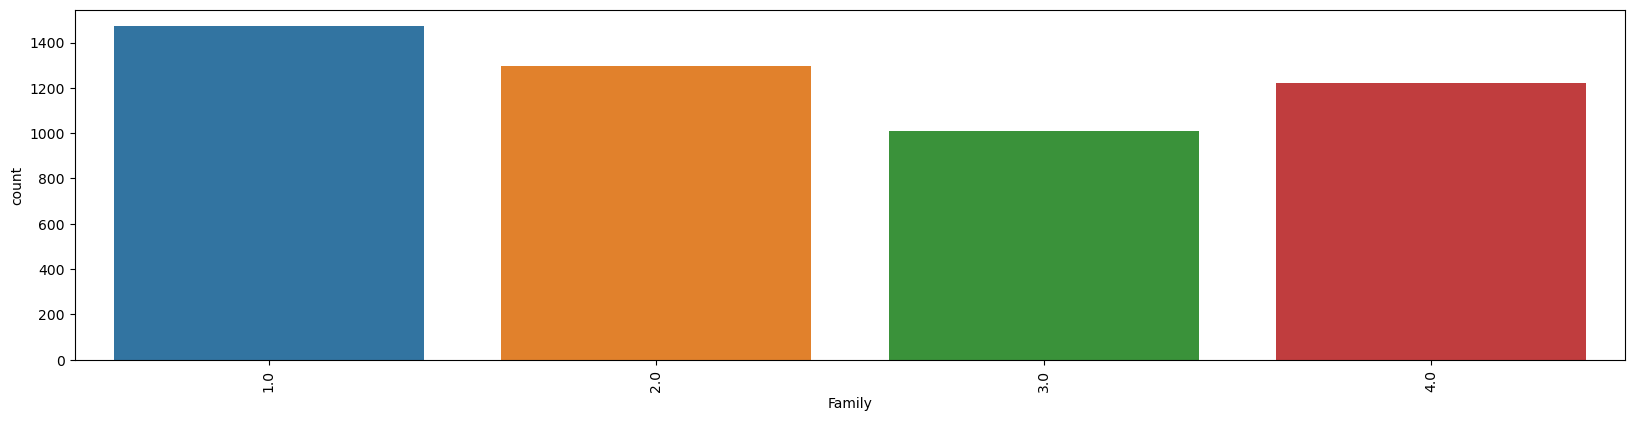

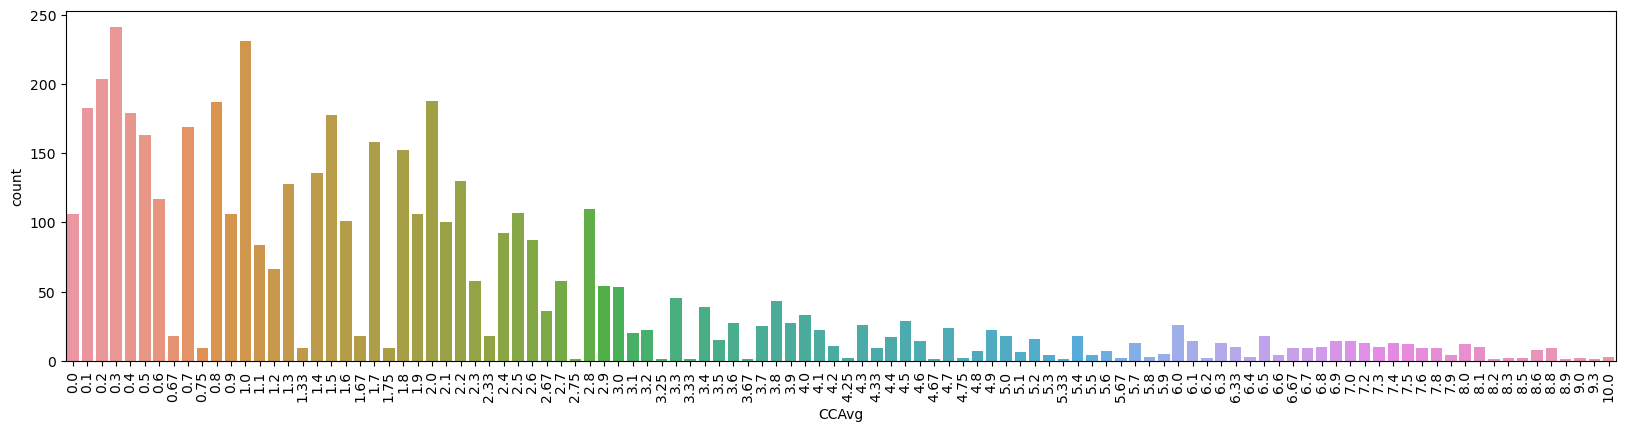

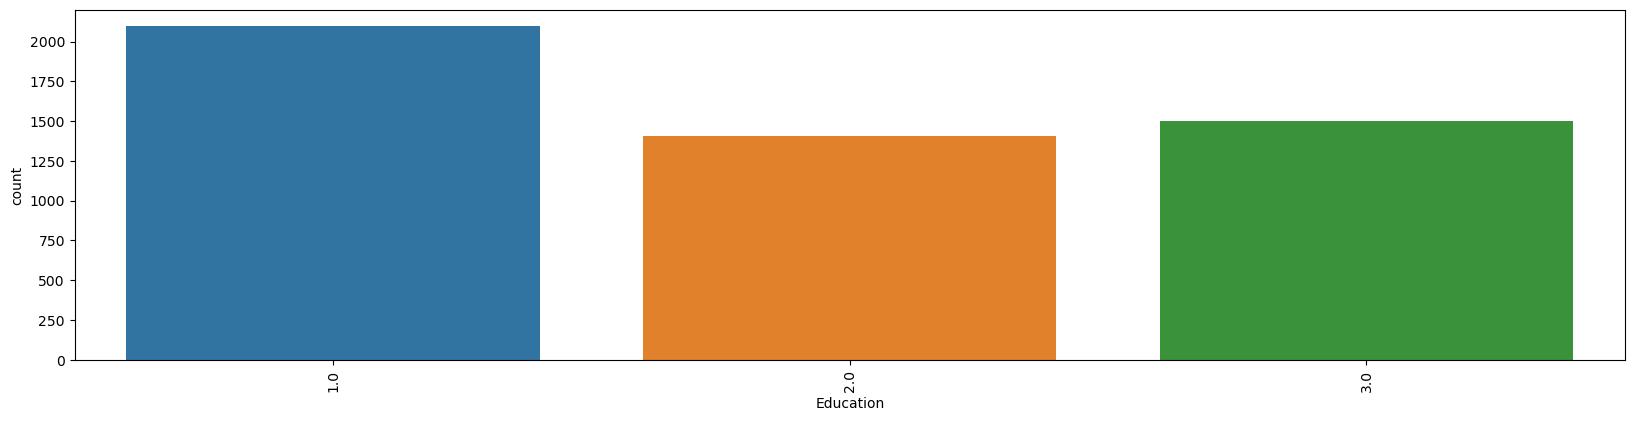

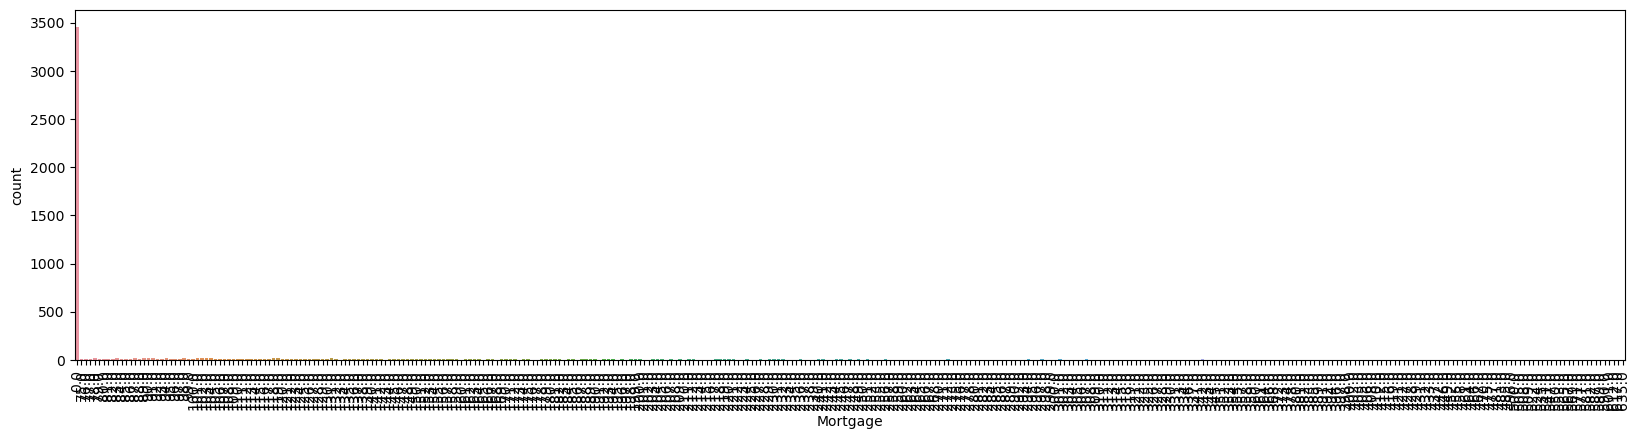

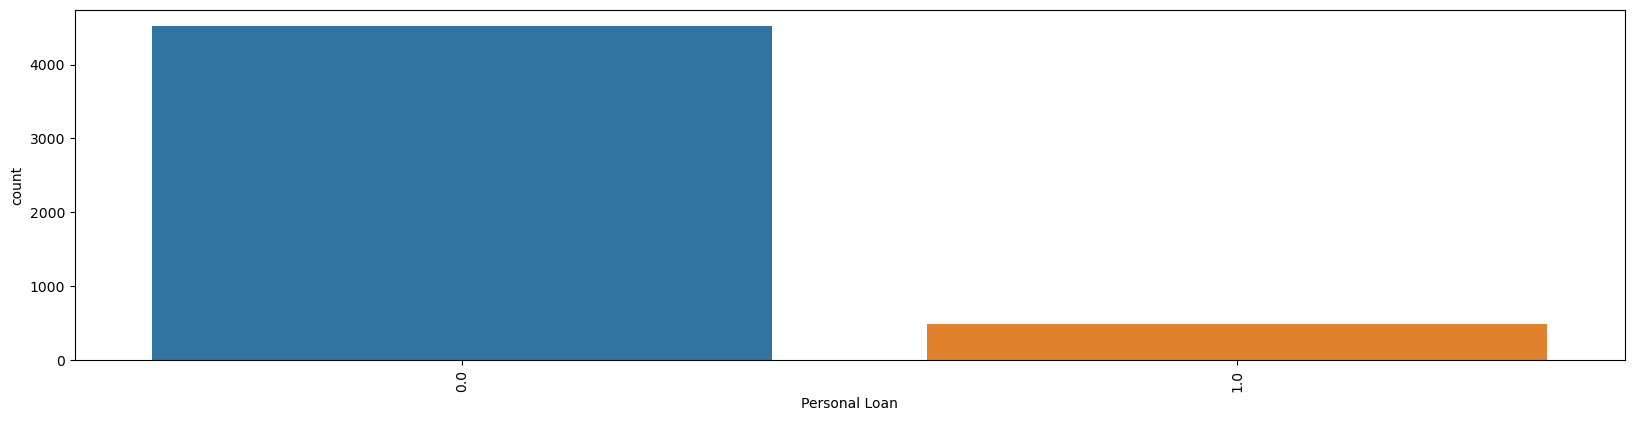

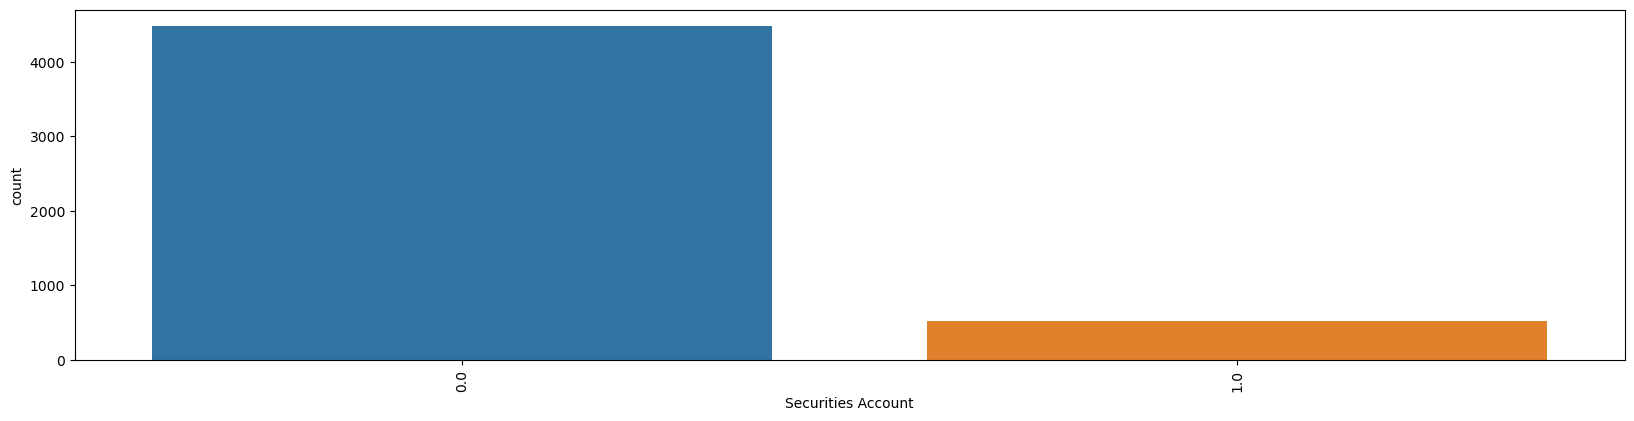

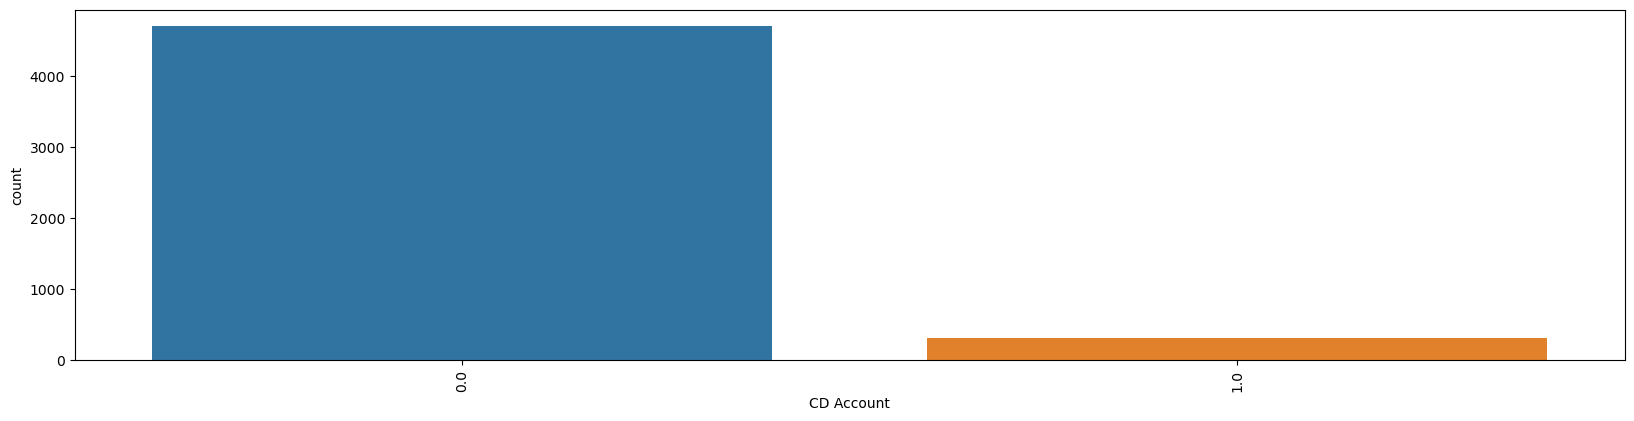

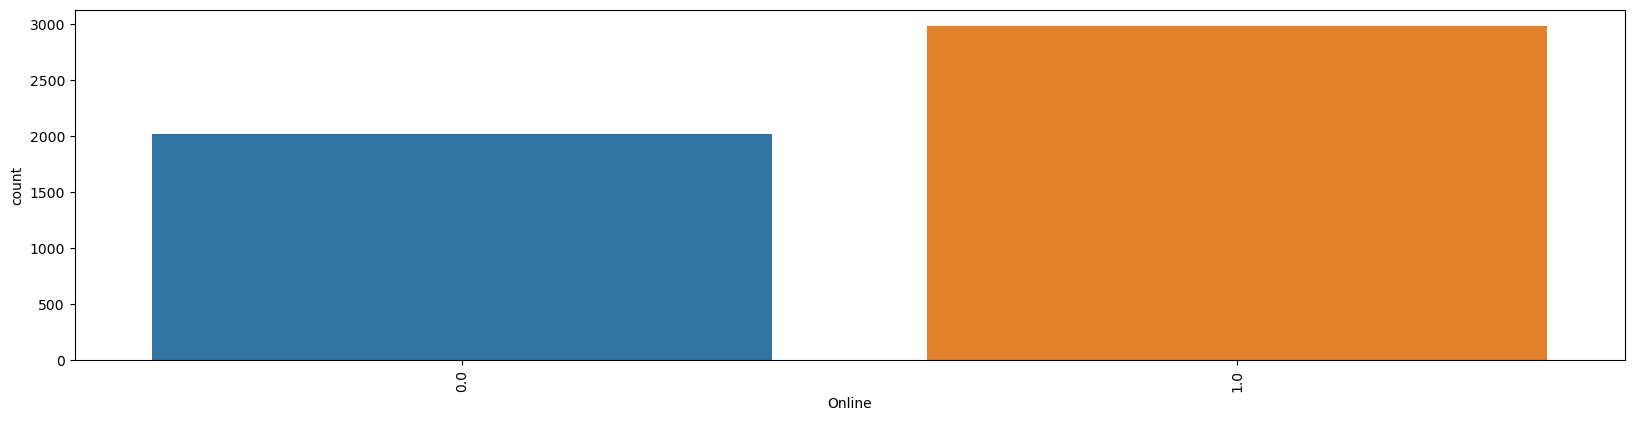

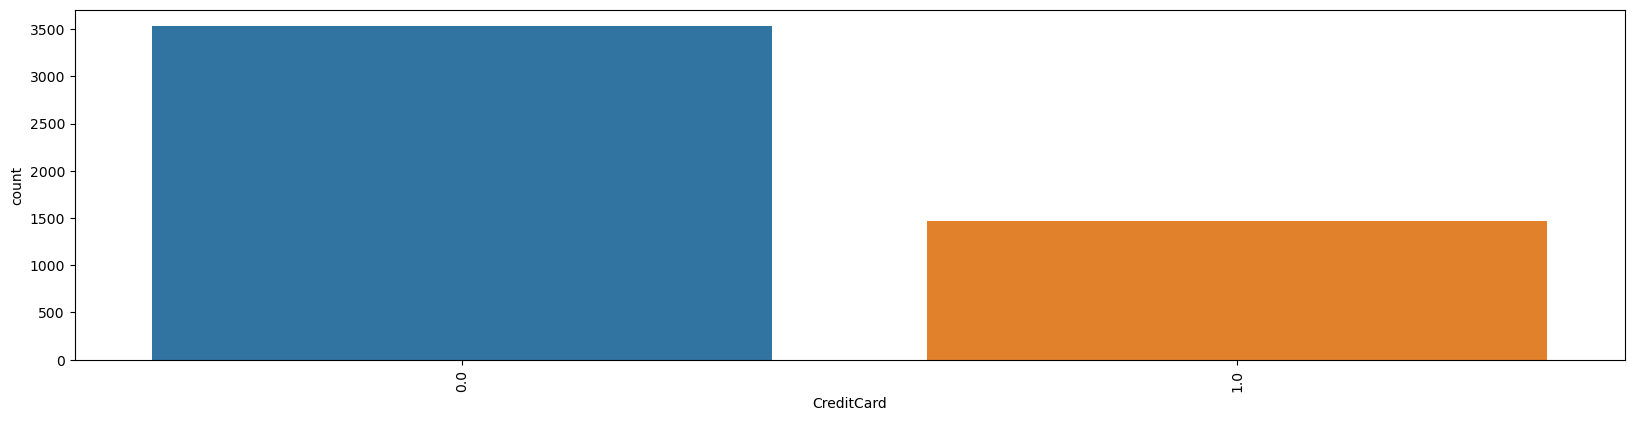

In [86]:
for i in df:
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    sns.countplot(x=df[i])
    plt.xticks(rotation=90)
    plt.show()
    

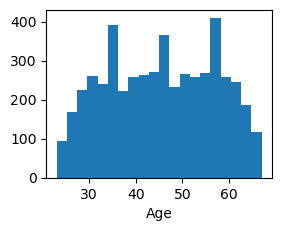

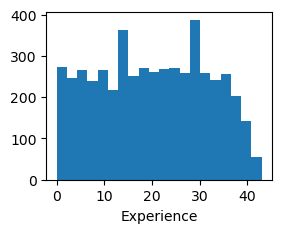

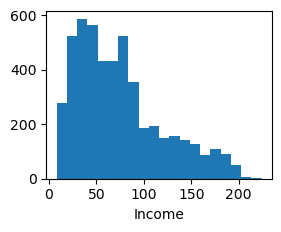

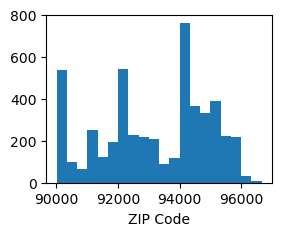

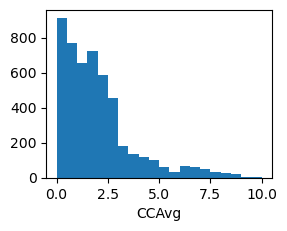

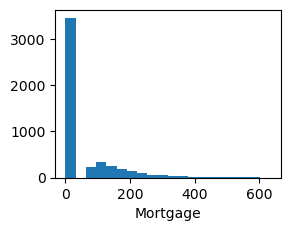

In [87]:
continious = ["Age","Experience","Income","ZIP Code","CCAvg","Mortgage"]
for i in continious:
    plt.subplot(2,2,1)
    plt.hist(df[i],bins=20)
    plt.xlabel(i)
    plt.show()

In [88]:
size = list(df["Online"].value_counts().values)
size

[2983, 2016]

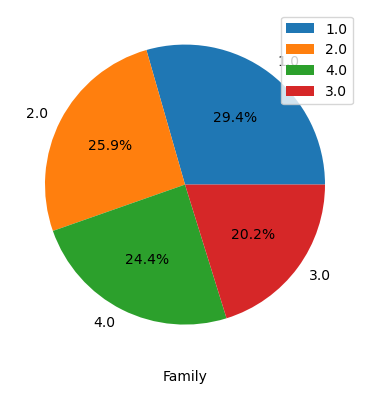

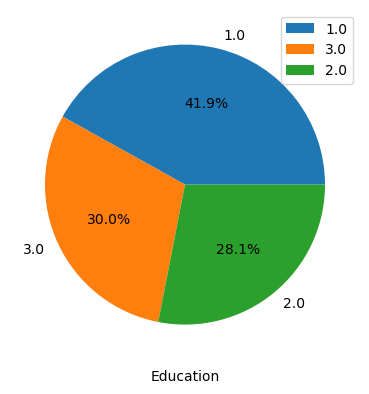

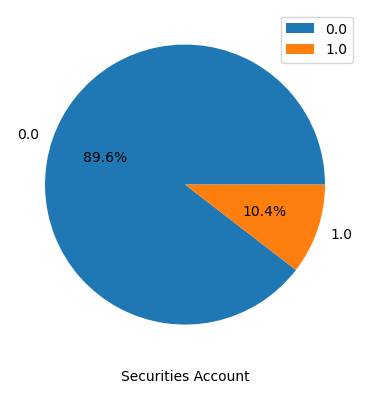

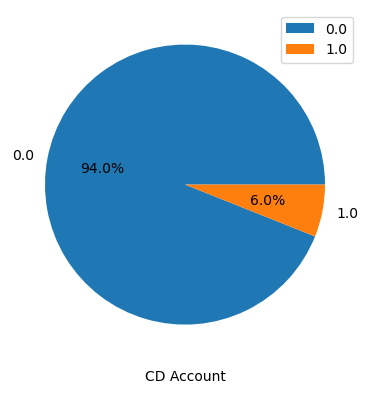

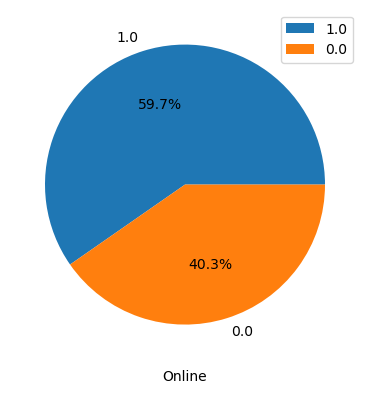

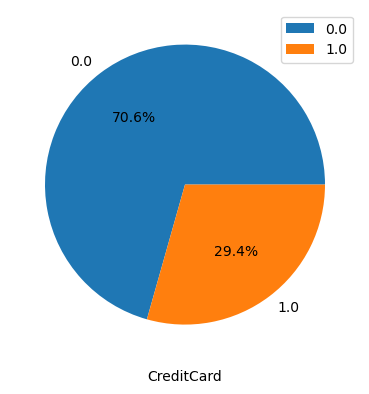

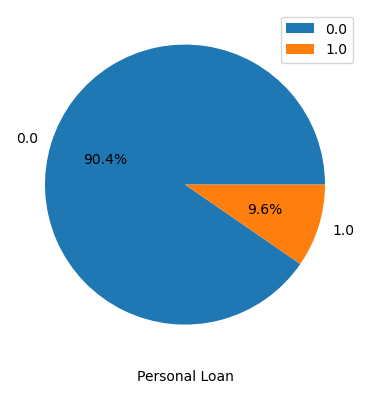

In [89]:
discrete = ['Family','Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard','Personal Loan']
for i in discrete:
    size = list(df[i].value_counts().values)
    labels = list(df[i].value_counts().index)
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.pie(size,labels=labels, autopct='%1.1f%%')
    plt.xlabel(i)
    plt.legend()
    plt.show()

<AxesSubplot:>

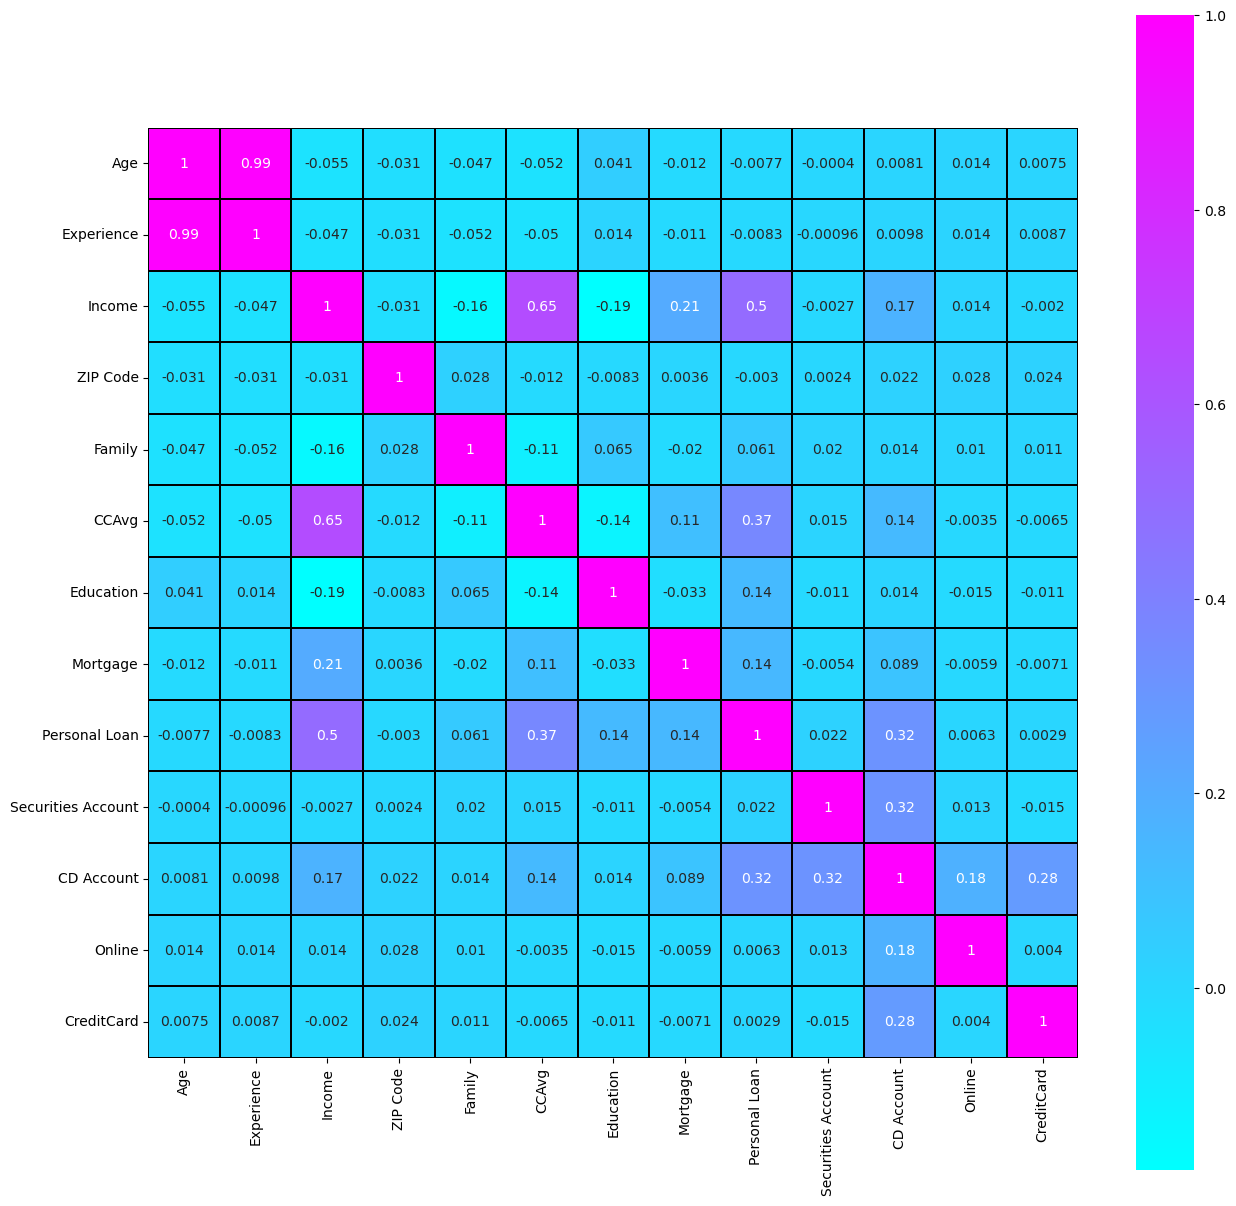

In [90]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),square=True,annot=df.corr(),cmap='cool',linecolor='black',linewidth=0.003)

In [96]:

import zipcodes

In [110]:

df.reset_index(drop=True,inplace=True)

In [ ]:
# we must reverse the list 

In [275]:
df2=df.astype(int)

In [276]:
zipcode = list(df2['ZIP Code'])


counties=[]
long=[]
lat=[]
for i in zipcode:
    geofin = zipcodes.matching(str(i))
    if len(geofin)> 0:
        county = geofin[0].get('county')
        longi = geofin[0].get('long')
        lati = geofin[0].get('lat')
    else:
        county= np.NaN
        longi= np.NaN
        lati= np.NaN
    
    counties.insert(0,county)
    long.insert(0,longi)
    lat.insert(0,lati)
    
print(long)    
#zipcode[0]
print(zipcodes.matching('91107'))
# we must reverse the list
counties.reverse()
long.reverse()
lat.reverse()
df2['Location'] = counties
df2['Longitude'] = long
df2['Latitude'] = lat

        


['-117.8217', '-118.3994', '-119.2477', '-117.2482', '-117.8409', '-121.9022', '-118.1346', '-118.2889', '-118.5273', '-121.1837', '-117.4154', '-121.9460', '-121.8729', '-121.4012', '-122.2547', '-122.0754', '-120.3897', '-121.9150', '-118.4009', '-121.0755', '-118.0786', '-118.4163', '-118.4009', '-121.7733', '-121.3247', '-117.8192', '-121.5292', '-120.6207', '-118.4341', '-121.3843', '-122.4186', '-119.2955', '-117.8409', '-118.8782', '-122.2648', '-118.4041', '-121.9614', '-118.2286', '-118.4307', '-118.3915', '-119.5177', '-118.4432', '-121.3494', '-122.4209', '-118.2589', '-122.5407', '-121.9848', '-122.4185', '-117.0918', '-118.2883', '-122.4395', '-121.9295', '-122.0680', '-119.8269', '-120.9849', '-117.2575', '-122.2780', '-122.3071', '-118.4883', '-117.8506', '-117.2575', '-121.8697', '-122.5813', '-117.2440', '-122.1485', '-121.9218', '-117.1369', '-118.0894', '-121.8160', '-118.4432', '-117.2964', '-118.4041', '-122.2547', '-116.8371', '-122.1861', '-118.6307', '-117.1369'

In [277]:
df2['Longitude'] = df2['Longitude'].astype(float)
df2['Latitude'] = df2['Latitude'].astype(float)


In [284]:

import plotly.express as px

fig = px.scatter_mapbox(df2, lat='Latitude', lon='Longitude',mapbox_style='carto-positron',color=df2['ZIP Code'])

fig.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'Los Angeles County'),
  Text(1, 0, 'Alameda County'),
  Text(2, 0, 'San Francisco County'),
  Text(3, 0, 'San Diego County'),
  Text(4, 0, 'Monterey County'),
  Text(5, 0, 'Ventura County'),
  Text(6, 0, 'Santa Barbara County'),
  Text(7, 0, 'Marin County'),
  Text(8, 0, 'Santa Clara County'),
  Text(9, 0, 'Santa Cruz County'),
  Text(10, 0, 'San Mateo County'),
  Text(11, 0, 'Humboldt County'),
  Text(12, 0, 'Contra Costa County'),
  Text(13, 0, 'Orange County'),
  Text(14, 0, 'Sacramento County'),
  Text(15, 0, 'Yolo County'),
  Text(16, 0, 'Placer County'),
  Text(17, 0, 'San Bernardino County'),
  Text(18, 0, 'San Luis Obispo County'),
  Text(19, 0, 'Riverside County'),
  Text(20, 0, 'Kern County'),
  Text(21, 0, 'Fresno County'),
  Text(22, 0, 'Sonoma County'),
  Text(23, 0, 'El Dorado County

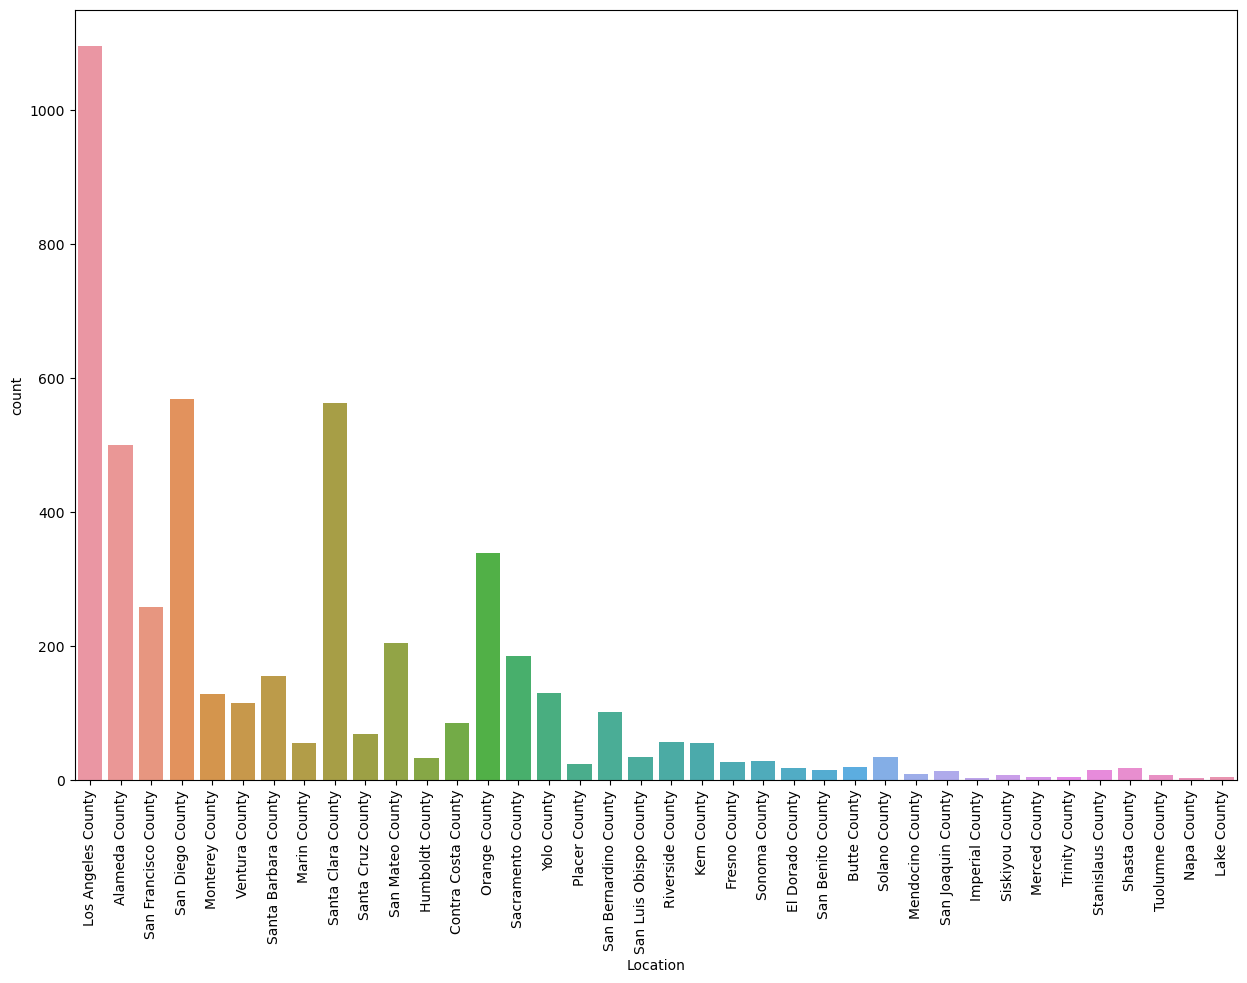

In [279]:
plt.figure(figsize=(15,10))
sns.countplot(x=df2['Location'])
plt.xticks(rotation=90)

In [ ]:
# machine learning

In [168]:
df[df['Income']>210]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3895,48.0,24.0,224.0,93940.0,2.0,6.67,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4992,45.0,21.0,218.0,91801.0,2.0,6.67,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [169]:
df[df['CCAvg']==10]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
786,45.0,15.0,202.0,91380.0,3.0,10.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
2100,35.0,5.0,203.0,95032.0,1.0,10.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
2336,43.0,16.0,201.0,95054.0,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0


In [200]:
df2= df.drop([3896,4993,787,2101,2337])
df2

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4995,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4996,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [221]:
def check(dimension):
    acc = 0.95995995995996
    df3 = df2.drop(["Personal Loan",'Income2','Income_Ed'],axis=1)
    for i in df3:
        column_val = df3[i] ** dimension
        column_name = i+str(2)
        df3.insert(0,column_name,column_val)
        X = df3
        scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
        X = scaler.fit_transform(X)
        Y = df2['Personal Loan']
        X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
        model2 =KNeighborsClassifier(3)
        model2.fit(X_train, Y_train)
        Y_pred = model2.predict(X_test)
        acc_new = metrics.accuracy_score(Y_test,Y_pred)
        if acc_new<=acc:
            df3.drop(column_name,axis=1,inplace=True)
        else:
            acc= acc_new
            print(acc)
    else:
        print('acc',acc)
        print(df3)
        
check(2)


0.965965965965966
acc 0.965965965965966
      Income2   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0      2401.0  25.0         1.0    49.0   91107.0     4.0    1.6        1.0   
1      1156.0  45.0        19.0    34.0   90089.0     3.0    1.5        1.0   
2       121.0  39.0        15.0    11.0   94720.0     1.0    1.0        1.0   
3     10000.0  35.0         9.0   100.0   94112.0     1.0    2.7        2.0   
4      2025.0  35.0         8.0    45.0   91330.0     4.0    1.0        2.0   
...       ...   ...         ...     ...       ...     ...    ...        ...   
4994   1600.0  29.0         3.0    40.0   92697.0     1.0    1.9        3.0   
4995    225.0  30.0         4.0    15.0   92037.0     4.0    0.4        1.0   
4996    576.0  63.0        39.0    24.0   93023.0     2.0    0.3        3.0   
4997   2401.0  65.0        40.0    49.0   90034.0     3.0    0.5        2.0   
4998   6889.0  28.0         4.0    83.0   92612.0     3.0    0.8        1.0   

      Mortg

In [231]:
Income2 = df2['Income'] ** 2
Income_Ed = df2['Income'] * df2['Education']
df2.insert(0,'Income2',Income2)
df2.insert(0,'Income_Ed',Income_Ed)
#df2.drop(["Income2","Income_Ed"],axis=1,inplace=True)

In [255]:
X = df2.drop(["Personal Loan"],axis=1)

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)
Y = df2['Personal Loan'].values.reshape(-1,1)

In [264]:

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [265]:
from sklearn.neighbors import KNeighborsClassifier
model2 =KNeighborsClassifier(3)
model2.fit(X_train, Y_train.ravel())
Y_pred= model2.predict(X_test)

In [266]:
model2.score(X_train,Y_train.ravel())

0.9787234042553191

In [267]:
print('accuracy:', metrics.accuracy_score(Y_test,Y_pred))

accuracy: 0.970970970970971


In [ ]:
# test accuracy is sometimes 0.9709 or 0.9749

In [237]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
results = cross_val_score(model2, X_train, Y_train.ravel(), cv=KFold(10))
print(results)
print(np.mean(results))

[0.965      0.955      0.9625     0.9675     0.9875     0.96741855
 0.96240602 0.93984962 0.96992481 0.95238095]
0.9629479949874687


In [215]:
# of course we havent any problem in croos validation of model without income2 and income_ed

In [238]:
from sklearn.metrics import confusion_matrix, classification_report

In [239]:
print(confusion_matrix(Y_test,Y_pred))

[[894   2]
 [ 27  76]]


In [240]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       896
         1.0       0.97      0.74      0.84       103

    accuracy                           0.97       999
   macro avg       0.97      0.87      0.91       999
weighted avg       0.97      0.97      0.97       999



In [241]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1,50)}
grid_kn = GridSearchCV(estimator=model2, 
                      param_grid=parameters, 
                      scoring='accuracy', 
                      cv=10, 
                      verbose=1, 
                      n_jobs=3 
                      )
grid_kn.fit(X_train,Y_train.ravel())

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=3,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [242]:
grid_kn.best_params_

{'n_neighbors': 3}

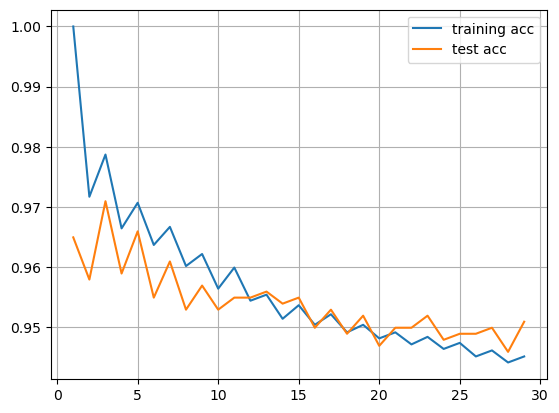

In [243]:
training_acc=[]
test_acc=[]
n_neighbors=range(1,30)
for i in n_neighbors:
    model_new = KNeighborsClassifier(i)
    model_new.fit(X_train,Y_train.ravel())
    Y_pred = model_new.predict(X_test)
    training_acc.append(model_new.score(X_train,Y_train.ravel()))
    test_acc.append(metrics.accuracy_score(Y_test,Y_pred))
plt.plot(n_neighbors, training_acc, label="training acc")
plt.plot(n_neighbors, test_acc, label="test acc")
plt.legend()
plt.grid()  

In [244]:
new_data = pd.DataFrame({"Age":[23.0,25.0,54.0],
                    "Experience":[18.0,9.0,29.0],
                    "Income":[58.0,150.0,23.0],
                    "ZIP Code":[92697.0,93023.0,94112.0],
                    "Family":[2.0,2.0,3.0],
                    'CCAvg':[7.9,3.2,1.6],
                    "Education":[1.0,2.0,3.0],
                    'Mortgage':[0.0,368.0,574.0],
                    'Securities Account':[0.0,1.0,0.0],
                    "CD Account":[0.0,0.0,1.0],
                    "Online":[1.0,1.0,0.0],
                    'CreditCard':[1.0,1.0,1.0],
                     'Personal Loan':[0.0,1.0,0.0]})
df_new=pd.DataFrame(new_data)
Income2 = df_new['Income'] ** 2
Income_Ed = df_new['Income'] * df_new['Education']
df_new.insert(0,'Income2',Income2)
df_new.insert(0,'Income_Ed',Income_Ed)

In [245]:
X = df2.drop(["Personal Loan"],axis=1)
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
Y = df2['Personal Loan'].values.reshape(-1,1)

clf = KNeighborsClassifier(3)
clf.fit(X,Y.ravel())

KNeighborsClassifier(n_neighbors=3)

In [246]:
clf.score(X,Y)

0.9795754905887064

In [247]:
df3 = df2.append(df_new)
df3.reset_index(drop=True,inplace=True)


In [248]:
df3

,Income_Ed,Income2,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49.0,2401.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,34.0,1156.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,11.0,121.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,200.0,10000.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90.0,2025.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,98.0,2401.0,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4993,83.0,6889.0,28.0,4.0,83.0,92612.0,3.0,0.8,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4994,58.0,3364.0,23.0,18.0,58.0,92697.0,2.0,7.9,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4995,300.0,22500.0,25.0,9.0,150.0,93023.0,2.0,3.2,2.0,368.0,1.0,1.0,0.0,1.0,1.0


In [249]:
X_train = df3.drop(['Personal Loan'],axis=1)[:4994]
Y_train = df3['Personal Loan'].values.reshape(-1,1)[:4994]
X_new = df3.drop(['Personal Loan'],axis=1)[4994:]
clf.fit(X_train,Y_train.ravel())


KNeighborsClassifier(n_neighbors=3)

In [250]:
Y_new = clf.predict(X_new)
Y_new

array([0., 0., 0.])